<a href="https://www.kaggle.com/code/nadiaarellanog/modelo-de-predicci-n-de-lluvias?scriptVersionId=240934014" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Predicción de Lluvias mediante Machine Learning con metodología CRISP-DM
*Caso: Observaciones meteorológicas diarias de múltiples ubicaciones en Australia*

# Fase 1: Comprensión del problema

1. **IDENTIFICACIÓN DEL PROBLEMA:**
Las condiciones climáticas y los datos meteorológicos diarios son de vital importancia en Australia debido a su vulnerabilidad a fenómenos meteorológicos extremos, como sequías, inundaciones, tormentas e incendios forestales. Estos eventos tienen un impacto significativo en varios sectores del país y en la vida de los australianos. La disponibilidad de información precisa y actualizada sobre el clima es crucial para tomar decisiones informadas en áreas como la agricultura, la gestión del agua, la generación de energía y la seguridad pública. Además, el sector del turismo se ve fuertemente influenciado por las condiciones climáticas, ya que los visitantes buscan disfrutar de actividades al aire libre en playas, parques nacionales y otros lugares. Es importante identificar esta problemática, dadas las condiciones de Australia, ya que se divide en 6 estados federados (Nueva Gales del Sur, Queensland, Australia Meridional, Tasmania -incluida la isla Macquarie-, Victoria y Australia Occidental) y diez territorios federales, de los cuales tres son territorios interiores (el Territorio de la Capital Australiana, el Territorio de la Bahía de Jervis y el Territorio del Norte) en el continente australiano. Cada uno de ellos contiene diferentes climas, variando desde el centro desértico hasta las zonas costeras más fluviales. Australia también experimenta diferentes estaciones según si se trata de una zona costera o céntrica y está sujeto a climas extremos, incluso más que otros países de la misma latitud, debido a los efectos moderadores de los mares y océanos circundantes y a la ausencia de grandes montañas. En este contexto, explorar la importancia de las condiciones climáticas y los datos meteorológicos diarios en Australia es fundamental para comprender cómo estos factores afectan diferentes aspectos de la vida y la economía del país. La predicción del clima es vital, ya que nos permite anticipar y planificar actividades, así como gestionar riesgos asociados a fenómenos meteorológicos extremos. Es crucial abordar la limitación de los datos hasta el año 2017 para asegurar que las predicciones puedan ser extrapoladas a años posteriores, lo que incluye el análisis de variables como la lluvia y las temperaturas.

2. **DETERMINACIÓN DE LOS OBJETIVOS:**
El objetivo principal es desarrollar un modelo de predicción de lluvia para los años siguientes en una zona con condiciones meteorológicas normales y comparar los cambios en los años posteriores. Para lograrlo, se desglosan las siguientes tareas:
- Desarrollar un modelo de predicción de lluvia: Utilizando datos históricos de variables meteorológicas relevantes, como la precipitación, temperatura, humedad, presión atmosférica, nubes, fecha, ubicación geográfica y altitud (msnm), se desarrollará un modelo predictivo capaz de predecir si lloverá al día siguiente en la zona de interés. La precisión del modelo será evaluada utilizando métricas adecuadas.
- Analizar cambios en los patrones de lluvia: Se analizarán los datos históricos de lluvia para identificar tendencias, patrones estacionales y cambios significativos en la cantidad y distribución de la lluvia a lo largo del tiempo. Se compararán los patrones de lluvia en diferentes años para determinar si ha habido cambios significativos en el clima de la zona y cómo estos pueden afectar las predicciones futuras de lluvia.

**KPI Cualitativo:**
- **Percepción de utilidad del modelo de predicción:** Se realizará una encuesta entre los usuarios internos del proyecto para evaluar su percepción sobre la utilidad del modelo de predicción de lluvia desarrollado. Se considerará como un indicador cualitativo el grado en que el equipo interno percibe que el modelo es útil para comprender y predecir los patrones de lluvia en la zona de interés. Una percepción positiva de utilidad indicaría que el modelo es efectivo y relevante para los objetivos del proyecto.

3. **EVALUACIÓN SITUACIÓN ACTUAL:**
Se dispone de un set de datos de observaciones meteorológicas diarias de múltiples ubicaciones en Australia, obtenidas de la Oficina de Meteorología de la Commonwealth de Australia y procesadas para crear este conjunto de datos de muestra. Los datos se han procesado para proporcionar una variable objetivo "RainTomorrow" (si hay lluvia al día siguiente - No / Sí) y una variable de temperatura "MaxTemp" (cuánta temperatura máxima en grados celsius), lo que permite explorar y buscar información relevante para analizar patrones climáticos y predecir si lloverá o no al día siguiente en diferentes ubicaciones.

**Mapa climatológico de Australia**

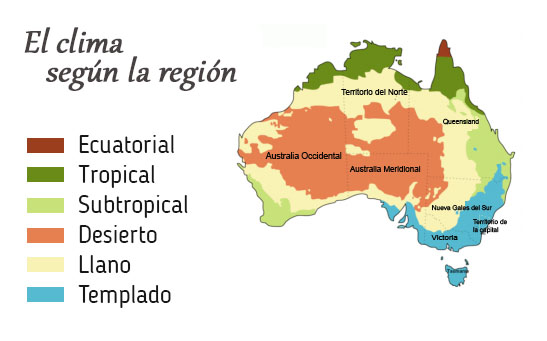

In [1]:
from PIL import Image
import IPython.display as display

image_path = "/kaggle/input/australianmaps/mapaAustralia.jpeg"
img = Image.open(image_path)
display.display(img)

**Mapa político de Australia**

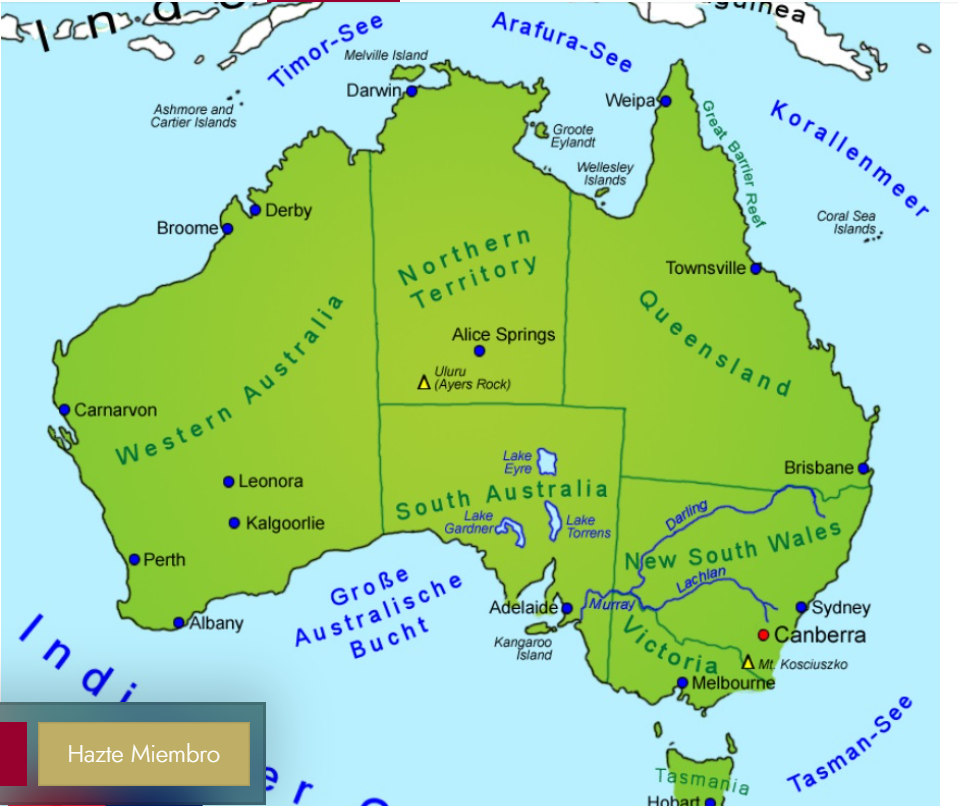

In [2]:
from PIL import Image
import IPython.display as display

image_path = "/kaggle/input/australianmaps/MapaAustraliaUluru.png"
img = Image.open(image_path)
display.display(img)

# Fase 2: Comprensión de los datos


1. **RECOLECCIÓN DE DATOS:** Set de datos de observaciones meteorológicas diarias de múltiples ubicaciones en Australia, obtenidas de la Oficina de Meteorología de la Commonwealth de Australia.

In [3]:
# Importación de bibliotecas de Python para el análisis de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Carga de datos**

In [4]:
#Cargamos los datos en Python
data = pd.read_csv('/kaggle/input/weatheraus/weatherAUS.csv')

**Estructura y contenido del dataset**

In [5]:
#Mostramos el dataset
data.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

Se cuenta con un conjunto de datos que incluyen información como fecha, ubicación, temperaturas mínimas y máximas, lluvias, evaporación, horas de sol, dirección del viento, ráfagas y velocidad del viento, humedad, presión atmosférica, nubosidad, variable objetivo lluviahoy  y una variable de riesgo RISK_M.t que indica la lluvia registrada en milímetros.

**Tamaño del dataset**

In [6]:
# Tamaño de los datos (filas, columnas)
data.shape

(142193, 24)

El dataset se compone de 142193 filas y 24 columnas.

2. **EXPLORACIÓN DE DATOS:** Análisis exploratorio de los datos para comprender su distribución, identificar valores atípicos, verificar la calidad de los datos y entender las relaciones entre las variables. Esto incluye estadísticas descriptivas, gráficos y visualizaciones.

**Tipos de datos de las columnas**

In [7]:
# Revisión de los tipos de datos
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

Encontramos 2 tipos de datos: object y float64.

**La naturaleza de los datos**

* **Date**: variable temporal
* **Location**: variable categórica nominal           
* **MinTemp**: variable numérica continua         
* **MaxTemp**: variable numérica continua         
* **Rainfall**: variable numérica continua       
* **Evaporation**: variable numérica continua    
* **Sunshine**: variable numérica continua       
* **WindGustDir**: variable categórica nominal     
* **WindGustSpeed**: variable numérica continua  
* **WindDir9am**: variable categórica nominal       
* **WindDir3pm**: variable categórica nominal     
* **WindSpeed9am**: variable numérica continua   
* **WindSpeed3pm**: variable numérica continua  
* **Humidity9am**: variable numérica continua    
* **Humidity3pm**: variable numérica continua    
* **Pressure9am**: variable numérica continua    
* **Pressure3pm**: variable numérica continua    
* **Cloud9am**: variable numérica discreta       
* **Cloud3pm**: variable numérica discreta      
* **Temp9am**: variable numérica continua       
* **Temp3pm**: variable numérica continua      
* **RainToday**: variable categórica nomina       
* **RISK_MM**: variable numérica continua        
* **RainTomorrow**: variable categórica nominal    

**Distribución de variables numéricas**


In [8]:
#mean=promedio  #std=desviación estandar # 50%=mediana
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm        RISK_MM  
count  88536.000000  85099.000000  141289.000000  139467.000000  142193.000000  
mean       4.437189      4.503167      16.987509      21.687235       2.360682  
std        2.887016      2.720633       6.492838       6.937594       8.477969  
min        0.000000      0.000000      -7.200000      -5.400000       0.000000  
25%        1.000000      2.000000      12.300000      16.600000       0.000000  
50%        5.000000      5.000000      16.700000      21.100000       0.000000  
75%        7.000000      7.000000      21.600000      26.400000       0.800000  
max        9.000000      9.000000      40.200000      46.700000     371.000000

Visión general de la distribución de las variables numéricas en donde podemos identificar cantidad de valores por columna, el promedio, la desviación estandar, valor mínimo y máximo, la mediana y los percentiles. Algunas observaciones preliminares que podemos identificar en los datos son:
- Porcentaje de humedad a las 9am y a las 3pm: Los valores mínimos son 0, lo que podría indicar valores perdidos o datos incorrectos.
- Fracción del cielo cubierto a las 9am y a las 3pm: Se mide en "octavos", donden valor 0 indica cielo totalmente despejado y 8 cielo totalmente
cubierto
- Registro de temperatura en grados celsius a las 9am y a la 3pm tienen una desviación estándar muy similar de 6.492838 y 6.937594 respectivamente.
- Cantidad de lluvia en mm, Los valores mínimos y máximos son 0 y 371 mm, respectivamente, lo que indica una amplia variabilidad en la cantidad de lluvia registrada.


**Rango de fechas del dataset**

In [9]:
# Rango de fechas de los registros
fecha_minima = data['Date'].min()
fecha_maxima = data['Date'].max()

print("Rango de fechas de los registros:")
print("Fecha mínima:", fecha_minima)
print("Fecha máxima:", fecha_maxima)


Rango de fechas de los registros:
Fecha mínima: 2007-11-01
Fecha máxima: 2017-06-25


Los datos registrados inician desde el 01 de noviembre del 2007 hasta el 25 de junio del 2017, lo que nos ayudará a realizar comparativas anuales y por estaciones del año que se adecuen a nuestros objetivos de análisis.

**Valores nulos de cada columna del dataset**

In [10]:
# Mostramos el número de valores faltantes de cada columna
for columna in data:
    num_faltantes = data[columna].isnull().sum()
    print(f"Columna '{columna}': {num_faltantes} valores faltantes")

Columna 'Date': 0 valores faltantes
Columna 'Location': 0 valores faltantes
Columna 'MinTemp': 637 valores faltantes
Columna 'MaxTemp': 322 valores faltantes
Columna 'Rainfall': 1406 valores faltantes
Columna 'Evaporation': 60843 valores faltantes
Columna 'Sunshine': 67816 valores faltantes
Columna 'WindGustDir': 9330 valores faltantes
Columna 'WindGustSpeed': 9270 valores faltantes
Columna 'WindDir9am': 10013 valores faltantes
Columna 'WindDir3pm': 3778 valores faltantes
Columna 'WindSpeed9am': 1348 valores faltantes
Columna 'WindSpeed3pm': 2630 valores faltantes
Columna 'Humidity9am': 1774 valores faltantes
Columna 'Humidity3pm': 3610 valores faltantes
Columna 'Pressure9am': 14014 valores faltantes
Columna 'Pressure3pm': 13981 valores faltantes
Columna 'Cloud9am': 53657 valores faltantes
Columna 'Cloud3pm': 57094 valores faltantes
Columna 'Temp9am': 904 valores faltantes
Columna 'Temp3pm': 2726 valores faltantes
Columna 'RainToday': 1406 valores faltantes
Columna 'RISK_MM': 0 valores

In [11]:
#Porcentaje de datos nulos
(data.isna().sum() / data.shape[0]) * 100

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RISK_MM           0.000000
RainTomorrow      0.000000
dtype: float64

En ambos resultados, se puede identificar que la columna con más valores nulos es Sunshine (número de horas brillantes en el día) con 67816 que equivale a un 47,69% , luego viene la columna de evaporación con 60843 (42,78%) datos nulos y en tercer lugar la Fracción del cielo cubierto a las 3pm (40,15%) con 57094 valores nulos.

**Identificación de Outliers en el data set original**

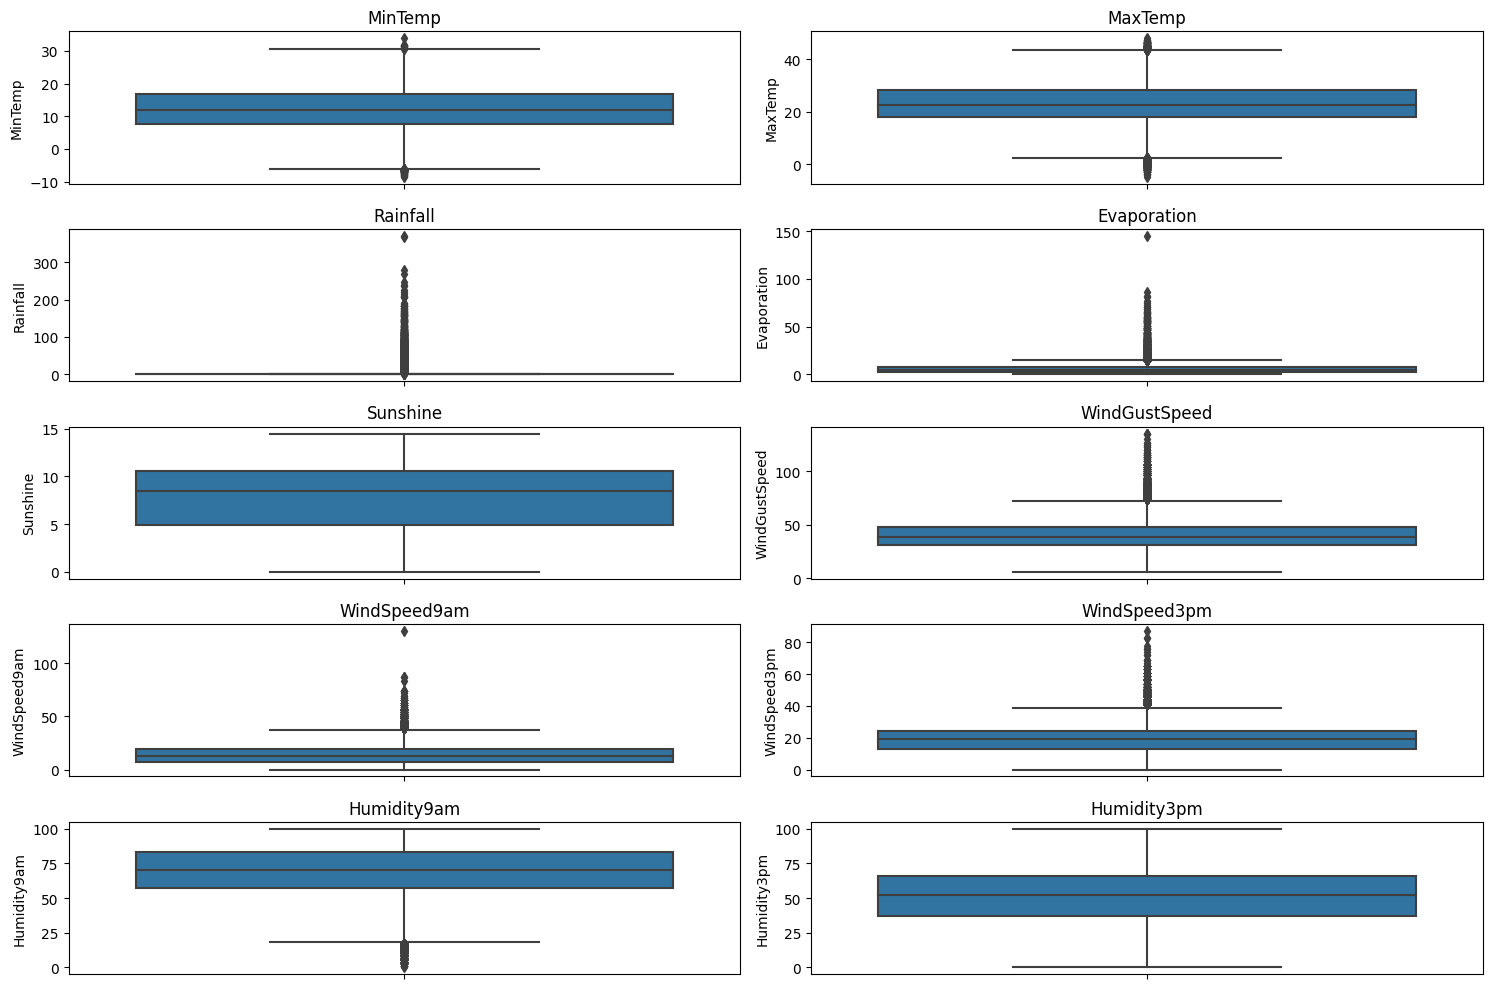

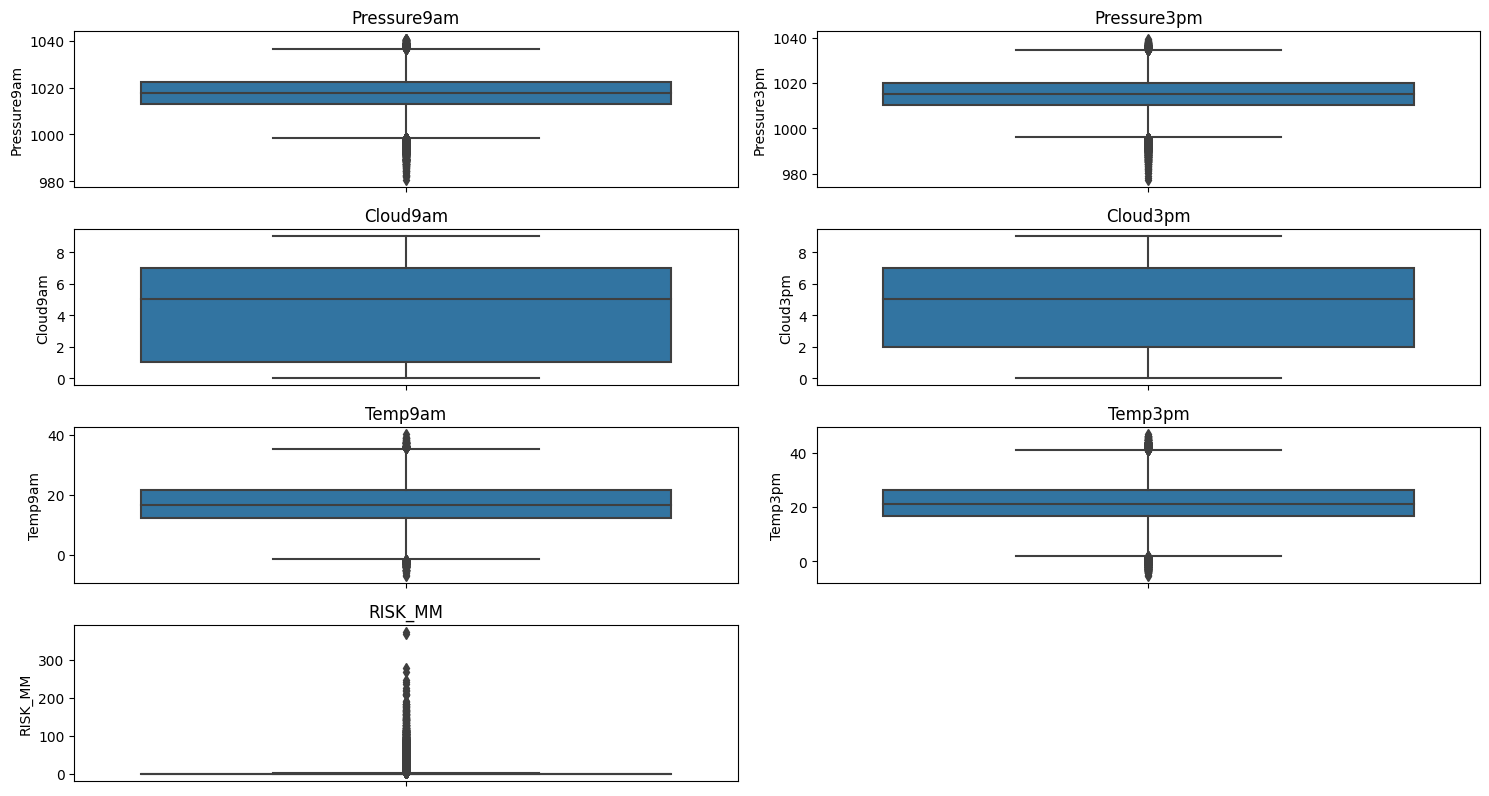

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las columnas numéricas
numeric_columns = data.select_dtypes(include=['float64']).columns

# Dividimos en grupos de 10
chunk_size = 10
num_chunks = len(numeric_columns) // chunk_size + 1

for chunk in range(num_chunks):
    start = chunk * chunk_size
    end = (chunk + 1) * chunk_size
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(numeric_columns[start:end], 1):
        plt.subplot(5, 2, i)
        sns.boxplot(y=data[column])
        plt.title(column)
    plt.tight_layout()
    plt.show()

Interpretación de los diagramas de caja (boxplots) aplicados a todas las variables numéricas del dataset en búsqueda de outliers:

* **MinTemp (Temperatura Mínima) y MaxTemp (Temperatura Máxima)**:Ambos gráficos muestran valores atípicos: MinTemp tiene outliers por debajo del rango entre los cuartiles y MaxTemp por encima. La mayoría de los datos están concentrados en un rango estrecho, con algunos valores extremos.

* **Rainfall (Precipitación) y Evaporation (Evaporación)**: Ambas variables presentan muchos outliers en el extremo superior. La mayoría de las observaciones tienen valores bajos, con algunos casos de alta precipitación y evaporación.

* **Sunshine (Horas de Sol)**: No se observan outliers significativos. La distribución se muestra más equilibrada.

* **WindGustSpeed (Velocidad de Ráfaga de Viento), WindSpeed9am, WindSpeed3pm** Todas estas variables muestran outliers en el extremo superior, indicando algunos días con ráfagas o velocidades de viento extremadamente altas.

* **Humidity9am y Humidity3pm (Humedad a las 9am y 3pm)**: Ambas variables tienen outliers en el extremo inferior, indicando algunos días con humedad muy baja.

* **Pressure9am y Pressure3pm (Presión a las 9am y 3pm)**: Se observan outliers en ambos extremos, aunque más notables en el extremo inferior, lo que sugiere algunas observaciones con presión extremadamente baja.

* **Cloud9am y Cloud3pm (Nubosidad a las 9am y 3pm)**: No se observan outliers significativos en ninguna de las dos variables. Las distribuciones parecen ser bastante uniformes.

* **Temp9am y Temp3pm (Temperatura a las 9am y 3pm)**: Similar a MinTemp y MaxTemp, muestran outliers tanto en el extremo inferior como en el superior, aunque menos pronunciados.

*Conclusión de Outliers*: Las variables Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, y Pressure3pm tienen una cantidad notable de outliers.

*Distribuciones*: La mayoría de las variables tienen una concentración central de datos con algunos valores extremos.

**Filas duplicadas**

In [13]:
# Identificando si hay filas duplicadas, el resultado indica cero.
data.duplicated().sum()

0

**Análisis de las estaciones meteorológicas**

In [14]:
# ¿En qué estación metereológica se estimó más días de lluvia?
lluvia_por_estacion = data[data.RainTomorrow == 'Yes'].groupby('Location')['RainTomorrow'].count().sort_values(ascending=False)

# Agregamos numeración a cada locación para conocer el total de estaciones meteorológicas
lluvia_por_estacion = lluvia_por_estacion.reset_index()
lluvia_por_estacion.index += 1
lluvia_por_estacion.index.name = 'Número'
lluvia_por_estacion.rename(columns={'RainTomorrow': 'Cantidad de días de lluvia pronosticadas'}, inplace=True)

print(lluvia_por_estacion)

                Location  Cantidad de días de lluvia pronosticadas
Número                                                            
1               Portland                                      1095
2                 Cairns                                       950
3                Walpole                                       949
4               Dartmoor                                       922
5           MountGambier                                       920
6          NorfolkIsland                                       919
7                 Albany                                       902
8            Witchcliffe                                       879
9           CoffsHarbour                                       869
10                Sydney                                       865
11                Darwin                                       852
12           MountGinini                                       819
13             NorahHead                                      

Se identifican un total de 49 estaciones de las cuales 5 son las que tienen más lluvias registradas: Portland, Cairns, Walpole, Dartmoor y MountGambier. Estas ciudades están ubicadas en los estados de Victoria, Queensland, Australia Occidental y Australia del Sur respectivamente.   

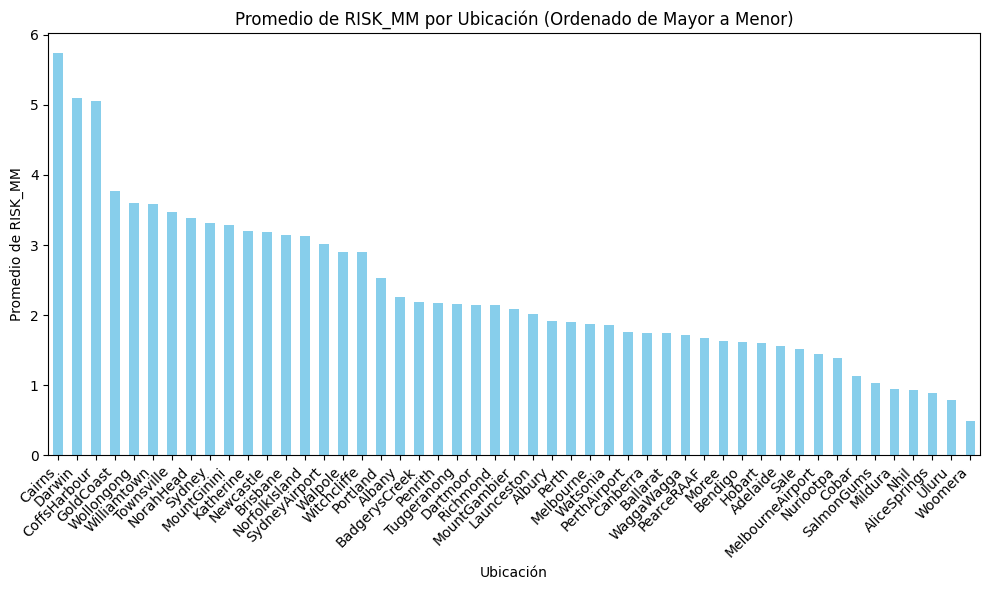

In [15]:
# Promedio de la variable 'RISK_MM' (riesgo de lluvia en milímetros) por cada estación meteorológica
# Agrupamos por Location y calculamos el promedio de RISK_MM
risk_by_location = data.groupby('Location')['RISK_MM'].mean()

# Ordenamos los datos de mayor a menor
risk_by_location_sorted = risk_by_location.sort_values(ascending=False)

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
risk_by_location_sorted.plot(kind='bar', color='skyblue')
plt.title('Promedio de RISK_MM por Ubicación (Ordenado de Mayor a Menor)')
plt.xlabel('Ubicación')
plt.ylabel('Promedio de RISK_MM')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El gráfico de barras anterior, permite visualizar las diferencias en promedios de la variable riesgo de lluvia entre diferentes ubicaciones de las estaciones metereológicas. Se visulizan las 3 estaciones con mayor promedio que son: Cairns (Estado de Queensland), Darwin (Territorio del Norte) y Coffsharbour (Estado Nueva Gales del Sur).

**Identificando si hay desbalanceo en las variables categóricas objetivos**

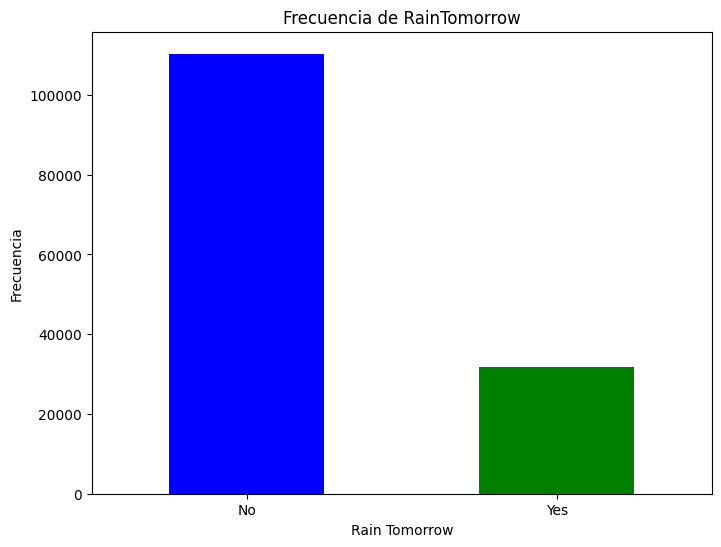

In [16]:
# Contamos las ocurrencias de cada categoría en la columna 'RainTomorrow'
rain_counts = data['RainTomorrow'].value_counts()

# Creamos el gráfico de barras
plt.figure(figsize=(8, 6))
rain_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Rain Tomorrow')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de RainTomorrow')
plt.xticks(rotation=0)
plt.show()

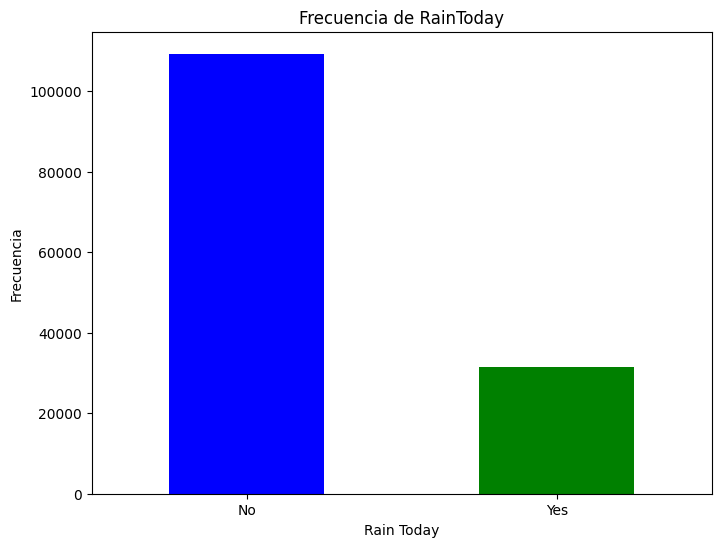

In [17]:
# Contamos las ocurrencias de cada categoría en la columna 'RainToday'
rain_counts = data['RainToday'].value_counts()

# Creamos el gráfico de barras
plt.figure(figsize=(8, 6))
rain_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Rain Today')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de RainToday')
plt.xticks(rotation=0)
plt.show()

En los gráficos anteriores, podemos visualizar que los valores de la columna objetivo "RainTomorrow" y "RainToday, se encuentran desbalanceados, por lo que en los próximos pasos tendremos que realizar un balanceo de carga para que esto no afecte la predicción del módelo.

**Resumen estadístico de las variables 'RISK_MM' y 'Rainfall'**

In [18]:
#Resumen estadístico de las variables 'RISK_MM' (cantidad de lluvia al día siguiente) y 'Rainfall' (lluvia caida en mm durante el día del registro)
print("Resumen estadístico de 'Rainfall':")
print(data['Rainfall'].describe())
print("\nResumen estadístico de 'RISK_MM':")
print(data['RISK_MM'].describe())

Resumen estadístico de 'Rainfall':
count    140787.000000
mean          2.349974
std           8.465173
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

Resumen estadístico de 'RISK_MM':
count    142193.000000
mean          2.360682
std           8.477969
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: RISK_MM, dtype: float64


Vemos en el resumen anterior, que las dos variables tienen estadísticas muy similares, con valores medios, medianos y cuartiles prácticamente idénticos. Sin embargo, 'Rainfall' tiene una desviación estándar ligeramente mayor lo que significa que los valores pueden estar más alejados de su promedio en comparación con los valores de 'RISK_MM'. Esto indica una mayor variabilidad en la cantidad de lluvia medida en relación con el riesgo de lluvia estimado.

**Analizando variable target RainTomorrow y variable RISK_MM (cantidad de lluvia en mm)**

In [19]:
# Creamos una máscara booleana para identificar las filas donde RISK es igual a 1.1 y LluviaMañana es 'Yes'
condicion_si = (data['RISK_MM'] == 1.1) & (data['RainTomorrow'] == 'Yes')

# Creamos una máscara booleana para identificar las filas donde RISK es igual a 1 y LluviaMañana es 'No'
condicion_no = (data['RISK_MM'] == 1) & (data['RainTomorrow'] == 'No')

# Creamos una máscara booleana para identificar las filas donde RISK es igual a 1 y LluviaMañana es 'Yes'
condicion_maybe = (data['RISK_MM'] == 1) & (data['RainTomorrow'] == 'Yes')

# Contamos cuántas filas cumplen con cada condición
conteo_si = len(data[condicion_si])
conteo_no = len(data[condicion_no])
conteo_maybe = len(data[condicion_maybe])

# Resultados
print(f"Número de registros donde RISK es 1.1 y LluviaMañana es 'Yes': {conteo_si}")
print(f"Número de registros donde RISK es 1 y LluviaMañana es 'No': {conteo_no}")
print(f"Número de registros donde RISK es 1 y LluviaMañana es 'Yes': {conteo_maybe}")

Número de registros donde RISK es 1.1 y LluviaMañana es 'Yes': 8
Número de registros donde RISK es 1 y LluviaMañana es 'No': 1761
Número de registros donde RISK es 1 y LluviaMañana es 'Yes': 0


Se evidencia que cuando la lluvia caida equivale a 1.1mm la variable RainTomorrow indica yes y cuando la lluvia caida corresponde a 1mm la variable RainTomorrow indica No.

**Tendencia de la lluvia caida 'Rainfall' y la lluvia pronosticada 'RISK_MM en periodo estival por año'**

In [20]:
# Convertimos columna "Date" a tipo fecha para análisis preexploratorio.
data['Date'] = pd.to_datetime(data['Date'])

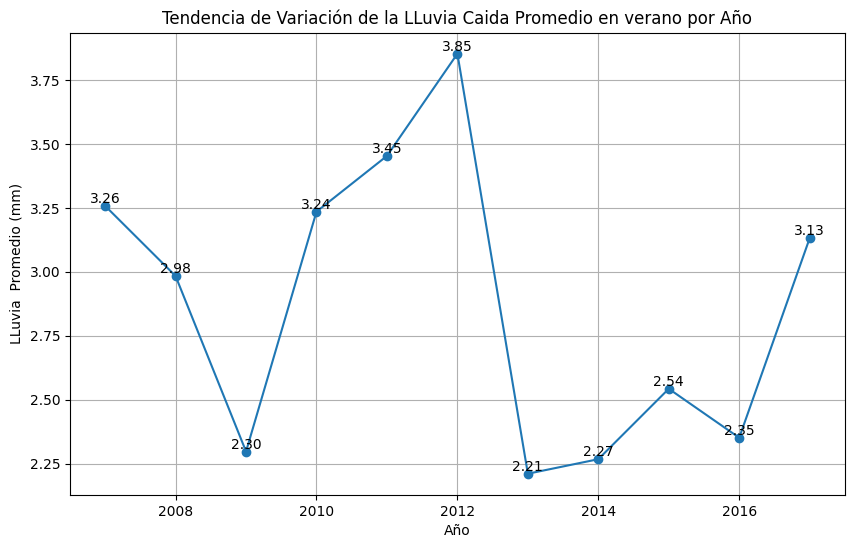

In [21]:
# Filtrar los datos por meses de diciembre, enero, febrero y marzo
data_estival = data[(data['Date'].dt.month.isin([12, 1, 2,3]))]

# Agrupar los datos por año y calculamos la lluvia caida máxima promedio
annual_max_rain = data_estival.groupby(data_estival['Date'].dt.year)['Rainfall'].mean()

# Crear el gráfico de tendencia por año
plt.figure(figsize=(10, 6))
plt.plot(annual_max_rain.index, annual_max_rain.values, marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('LLuvia  Promedio (mm)')
plt.title('Tendencia de Variación de la LLuvia Caida Promedio en verano por Año')
plt.grid(True)

# Agregar los valores en cada punto del gráfico
for x, y in zip(annual_max_rain.index, annual_max_rain.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

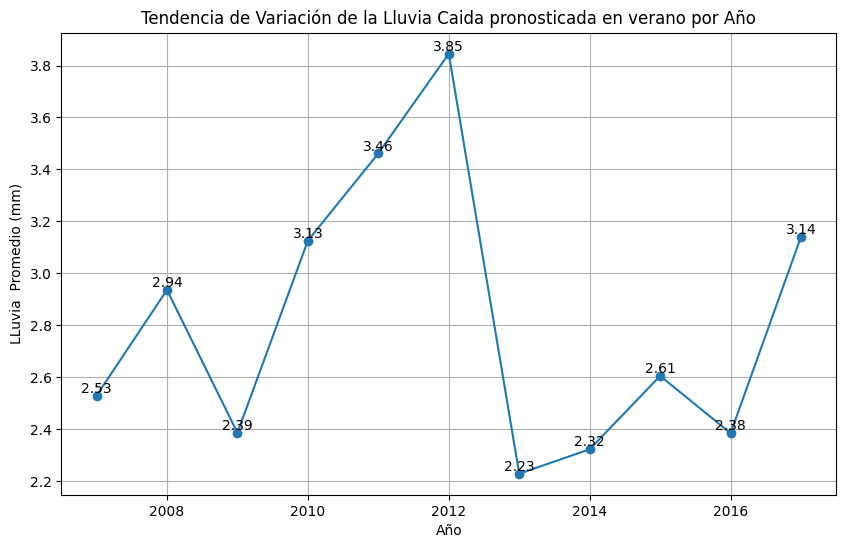

In [22]:
# Filtrar los datos por meses de diciembre, enero, febrero y marzo
data_estival = data[(data['Date'].dt.month.isin([12, 1, 2,3]))]

# Agrupar los datos por año y calculamos la lluvia pronosticada máxima promedio
annual_max_rain_pro = data_estival.groupby(data_estival['Date'].dt.year)['RISK_MM'].mean()

# Crear el gráfico de tendencia por año
plt.figure(figsize=(10, 6))
plt.plot(annual_max_rain_pro.index, annual_max_rain_pro.values, marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('LLuvia  Promedio (mm)')
plt.title('Tendencia de Variación de la Lluvia Caida pronosticada en verano por Año')
plt.grid(True)

# Agregamos los valores en cada punto del gráfico
for x, y in zip(annual_max_rain_pro.index, annual_max_rain_pro.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

En los gráficos anteriores, observamos que no hay una variabilidad en el año 2007, 2010, 2014 y 2015 que se debe analizar porque quizas no hay datos registrados suficientes para ese periodo y también se puede deber a los tipos de climas que tiene el continentes . En el resto de los años, se ven datos similares entre los promedios de lluvia caida y pronosticada.

**Diagrama de caja de lluvia en mm (Columnas 'Rainfall' y 'RISK_MM')**

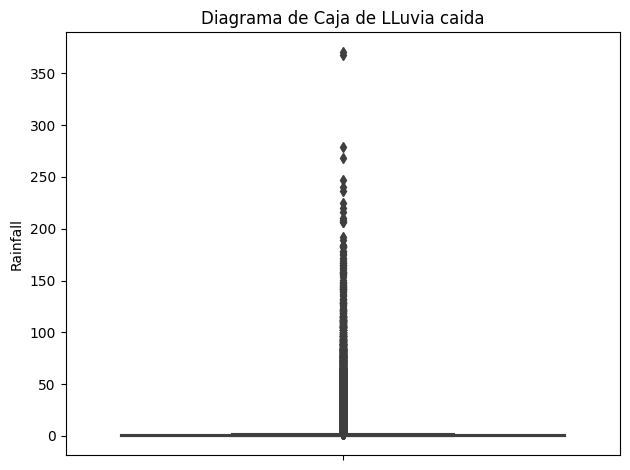

In [23]:
# Crear el diagrama de caja para la variable "Rainfall"
sns.boxplot(data=data, y="Rainfall")
plt.title('Diagrama de Caja de LLuvia caida')
plt.ylabel('Rainfall')
plt.tight_layout()
plt.show()

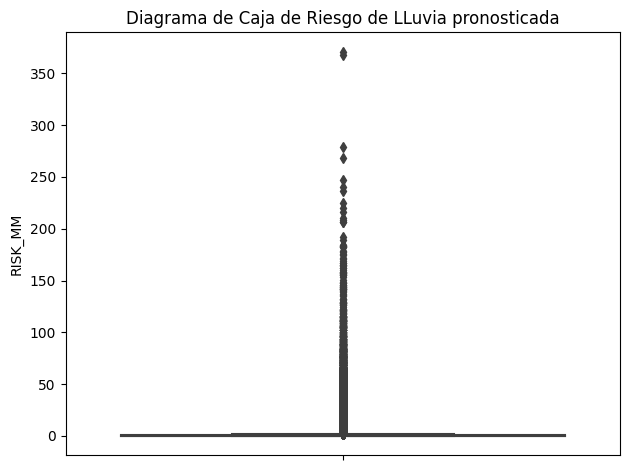

In [24]:
# Crear el diagrama de caja para la variable "RISK_MM"
sns.boxplot(data=data, y="RISK_MM")
plt.title('Diagrama de Caja de Riesgo de LLuvia pronosticada')
plt.ylabel('RISK_MM')
plt.tight_layout()
plt.show()

En los diagramas de caja de lluvia en mm anteriores, de las variables Rainfall (lluvia caida) y 'RISK_MM' (lluvia pronosticada), nos permite visualizar la distribución de la cantidad de lluvia en mm, en donde identificamos la mediana, la dispersión y la presencia de valores atípicos en los datos de precipitación. Las líneas que se extienden desde la caja muestran la dispersión de los datos fuera de los cuartiles. Los valores atípicos que encontramos están representados por puntos individuales superiores.

**Análisis de temperaturas**

In [25]:
#Ver el nombre de las columnas
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [26]:
#Promedio de temperaturas mínimas registradas
data['MinTemp'].mean()

12.186399728729267

In [27]:
#Promedio de temperaturas máximas registradas
data['MaxTemp'].mean()

23.226784191272355

Como vemos, los promedios de temperaturas varían entre 12.18 grados celcius la mínima y 23.22 grados celcius la máxima, lo que indica que tenemos una amplitud térmica moderada porque la diferencia entre la temperatura mínima y máxima es de aproximadamente 11.04 grados Celsius. Esta diferencia moderada indica que hay cambios significativos de temperatura a lo largo del día, pero no extremadamente grandes.

**Tendencia de las temperaturas mínimas y máximas' en periodo estival por año'**

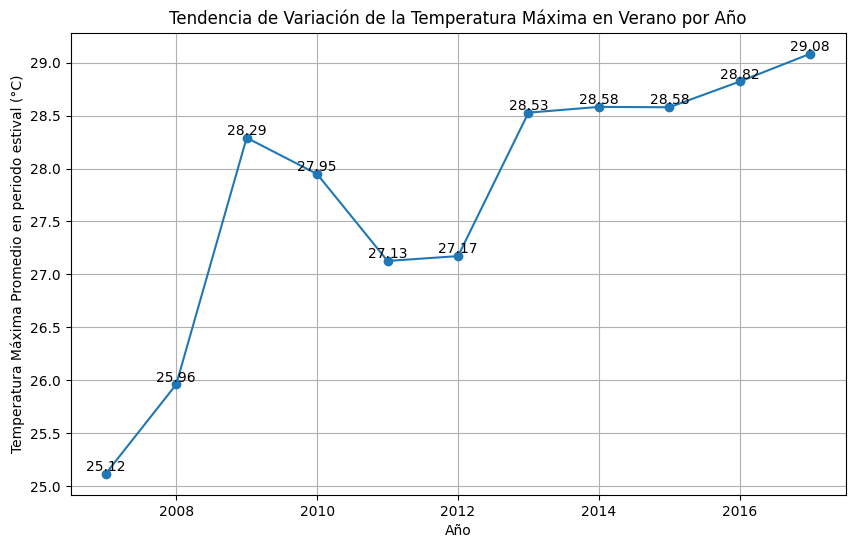

In [28]:
# Filtrar los datos por meses de diciembre, enero, febrero y marzo
data_estival = data[(data['Date'].dt.month.isin([12, 1, 2,3]))]

# Calculamos la temperatura máxima promedio para cada año en los meses seleccinados
annual_max_temp_estival = data_estival.groupby(data_estival['Date'].dt.year)['MaxTemp'].mean()

# Creamos el gráfico de tendencia para los meses seleccionados
plt.figure(figsize=(10, 6))
plt.plot(annual_max_temp_estival.index, annual_max_temp_estival.values, marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Temperatura Máxima Promedio en periodo estival (°C)')
plt.title('Tendencia de Variación de la Temperatura Máxima en Verano por Año')
plt.grid(True)

# Agregamos los valores en cada punto del gráfico
for x, y in zip(annual_max_temp_estival.index, annual_max_temp_estival.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

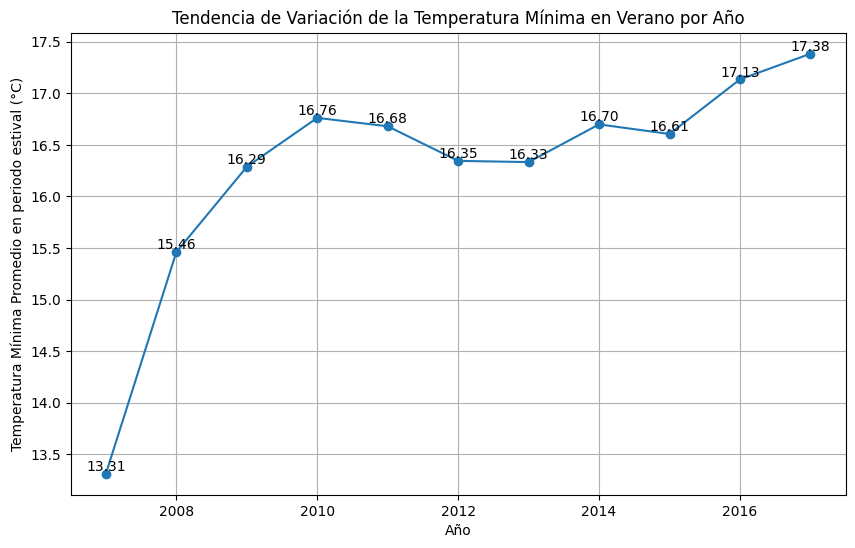

In [29]:
# Filtrar los datos por meses de diciembre, enero, febrero y marzo
data_estival = data[(data['Date'].dt.month.isin([12, 1, 2,3]))]

# Calculamos la temperatura mínima promedio para cada año en los meses seleccinados
annual_min_temp_estival = data_estival.groupby(data_estival['Date'].dt.year)['MinTemp'].mean()

# Creamos el gráfico de tendencia para los meses seleccionados
plt.figure(figsize=(10, 6))
plt.plot(annual_min_temp_estival.index, annual_min_temp_estival.values, marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Temperatura Mínima Promedio en periodo estival (°C)')
plt.title('Tendencia de Variación de la Temperatura Mínima en Verano por Año')
plt.grid(True)

# Agregamos los valores en cada punto del gráfico
for x, y in zip(annual_min_temp_estival.index, annual_min_temp_estival.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

En los gráficos anteriores se ve una tendencia de aumento de temperaturas mínimas y máximas en los últimos 2 años (2016 y 2017). La variación al alza en la temperatura mínima y máxima promedio durante los meses de verano puede indicar un problema del cambio climático. También, indica una mayor incidencia de días calurosos durante los meses de verano. Esto puede tener implicaciones en el turismo, la agricultura y otros sectores que dependen del clima.


**Diagrama de caja de tempreraturas en grados celcius (Columnas 'MaxTemp' y 'MinTemp')**

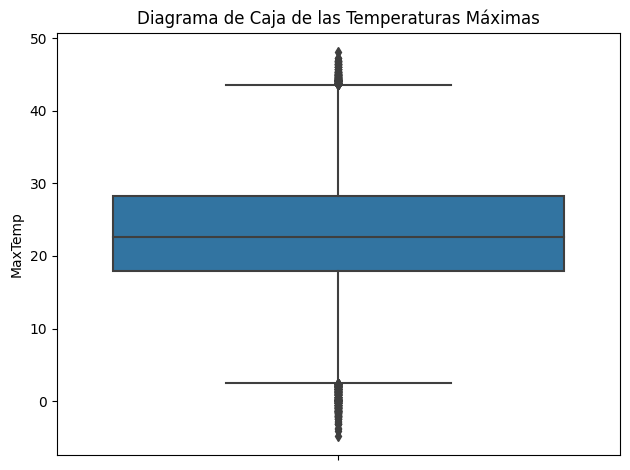

In [30]:
# Crear el diagrama de caja
sns.boxplot(data=data, y="MaxTemp")
plt.title('Diagrama de Caja de las Temperaturas Máximas')
plt.ylabel('MaxTemp')
plt.tight_layout()
plt.show()

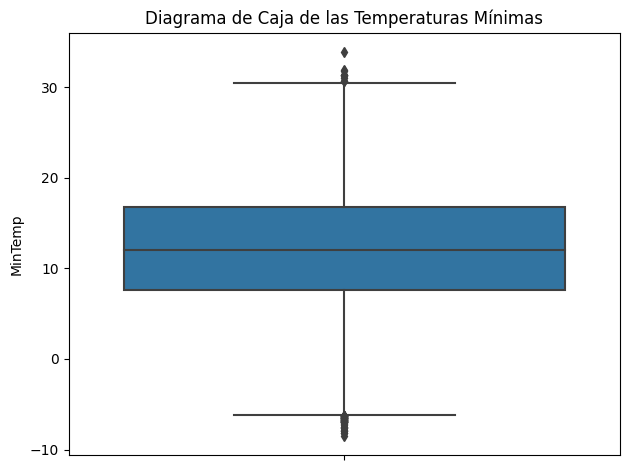

In [31]:
# Crear el diagrama de caja
sns.boxplot(data=data, y="MinTemp")
plt.title('Diagrama de Caja de las Temperaturas Mínimas')
plt.ylabel('MinTemp')
plt.tight_layout()
plt.show()

En los diagramas de cajas anteriores, permite visualizar la distribución de los valores de las temperaturas máxima y mínimas en grados celcius, incluida la mediana, los cuartiles y la presencia de valores atípicos en los valores de temperaturas mínimas con mayor grado.

**Generamos un gráfico de barras que muestra la distribución de las temperaturas máximas y mínimas en los diferentes rangos definidos**

In [32]:
data['MinTemp'].describe()

count    141556.000000
mean         12.186400
std           6.403283
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.800000
max          33.900000
Name: MinTemp, dtype: float64

In [33]:
data['MaxTemp'].describe()

count    141871.000000
mean         23.226784
std           7.117618
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64

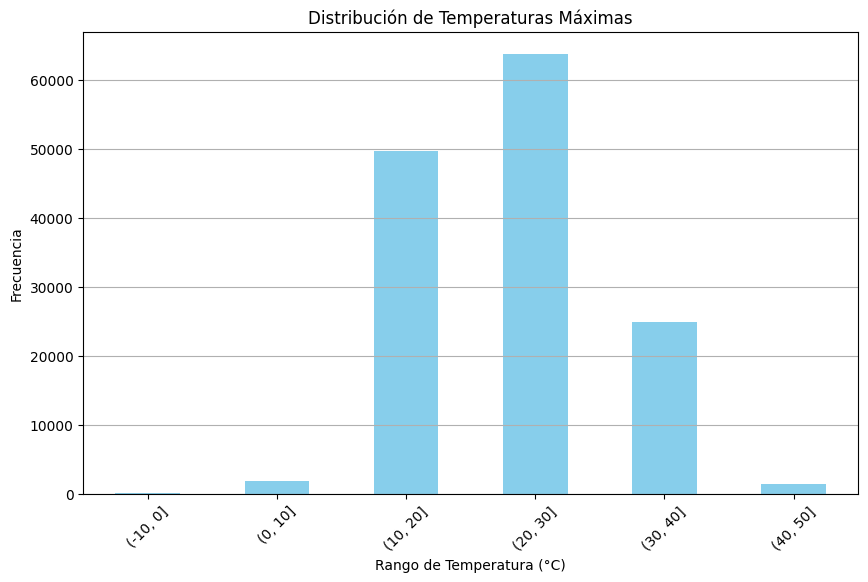

In [34]:
# Definimos los rangos de temperatura
bins = [-10, 0, 10, 20, 30, 40, 50]

# Dividimos los datos en los rangos de temperatura y contamos las observaciones en cada rango
temp_bins = pd.cut(data['MaxTemp'], bins=bins)
temp_counts = temp_bins.value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
temp_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Rango de Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Temperaturas Máximas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


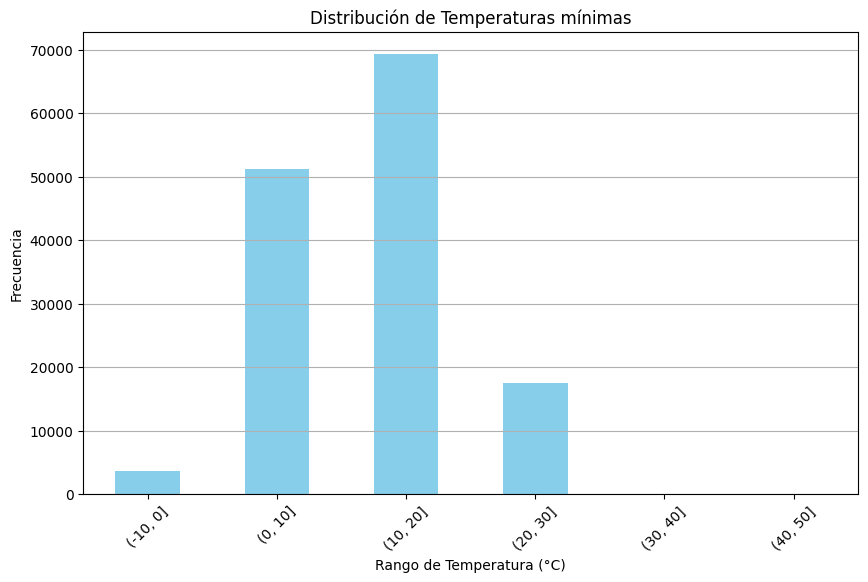

In [35]:
# Definimos los rangos de temperatura
bins = [-10, 0, 10, 20, 30, 40, 50]

# Dividimos los datos en los rangos de temperatura y contamos las observaciones en cada rango
temp_bins = pd.cut(data['MinTemp'], bins=bins)
temp_counts = temp_bins.value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
temp_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Rango de Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Temperaturas mínimas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


**Estaciones con registros extremos**

In [36]:
filtered_data = data[(data['MaxTemp'] <= 1) & (data['MaxTemp'] >= 0)]
filtered_locations = filtered_data.drop_duplicates(subset=['Location'])

print(filtered_locations[['Date', 'Location']])

            Date     Location
50914 2009-04-27  MountGinini


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


Se identifica la estación meteorológica que se ubica en Mount Ginini, donde la temperatura máxima está entre 0 y 2 grados celcius inclusive. Una montaña con una elevación de 1.762 metros AHD en Brindabella Ranges que se encuentra en la frontera entre el Territorio de la Capital Australiana y Nueva Gales del Sur en Australia.

In [37]:
filtered_data = data[(data['MinTemp'] <= 30) & (data['MinTemp'] >= 29)]
filtered_locations = filtered_data.drop_duplicates(subset=['Location'])

print(filtered_locations[['Date', 'Location']])

             Date      Location
5975   2009-02-06         Cobar
14571  2017-01-14         Moree
59188  2015-12-20       Bendigo
68556  2010-01-12       Mildura
71526  2014-02-03          Nhil
94051  2009-01-30      Adelaide
103735 2011-01-31       Woomera
119639 2014-01-12         Perth
132980 2009-03-01  AliceSprings
136066 2008-11-23        Darwin
140107 2015-11-26     Katherine
140948 2013-12-03         Uluru


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


Se identifican 12 estaciones meteorológicas con temperaturas mínimas que se ubican entre 29 y 30 grados celcius inclusive en los meses estivales comprendidos entre noviembre a marzo siendo en el año 2009 la cantidad de mayor registro.

**Agrupación de datos**

Mapa de Australia identificando estados y territorios (división politica)

In [38]:
#from IPython.display import display, Image
# Ruta de la imagen
#ruta_imagen = "C:\\Users\\narel\\Documents\\1er sem 2024\\mapaTerritorios.jpg"
# Mostrar la imagen
#display(Image(filename=ruta_imagen, width=350, height=650))

In [39]:
# Agrupamos por la columna 'Location'
ubicaciones = data['Location'].unique()

# Mostramos la lista de ubicaciones de estaciones meteorológicas para identificarlas facilente y poder crear con esa información el mapeo geográfico.
print(ubicaciones)


['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [40]:
# Diccionario de mapeo de estaciones a regiones geográficas
estaciones_por_estado = {
    'Nueva Gales del Sur': ['Albury', 'Badgerys Creek', 'Cobar', 'Coffs Harbour', 'Moree', 'Newcastle', 'Norah Head', 'Penrith', 'Richmond', 'Sídney', 'Aeropuerto de Sídney', 'Wagga Wagga', 'Williamtown', 'Wollongong'],
    'Territorio de la Capital Australiana': ['Canberra', 'Tuggeranong', 'Montaña Ginini'],
    'Victoria': ['Ballarat', 'Bendigo', 'Sale', 'Aeropuerto de Melbourne', 'Melbourne', 'Mildura', 'Nhill', 'Portland', 'Watsonia', 'Dartmoor'],
    'Queensland': ['Brisbane', 'Cairns', 'Gold Coast', 'Townsville'],
    'Australia del Sur': ['Adelaida', 'Montaña Gambier', 'Nuriootpa', 'Woomera'],
    'Australia Occidental': ['Albany', 'Witchcliffe', 'Base Aérea Pearce', 'Aeropuerto de Perth', 'Perth', 'Salmon Gums', 'Walpole'],
    'Tasmania': ['Hobart', 'Launceston'],
    'Territorio del Norte': ['Alice Springs', 'Darwin', 'Katherine', 'Uluru']
}

# Función para asignar el estado a una ubicación
def asignar_estado(location):
    for estado, estaciones in estaciones_por_estado.items():
        if location in estaciones:
            return estado
    return None

# Agregamos la nueva columna 'estado' al DataFrame new_data
data['Estado'] = data['Location'].apply(asignar_estado)

In [41]:
data.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Pressure9am  Pressure3pm  \
0           W           44.0          W  ...      1007.7       1007.1   
1         WNW           44.0        NNW  ...      1010.6       1007.8   
2         WSW           46.0          W  ...      1007.6       1008.7   
3          NE           24.0         SE  ...      1017.6       1012.8   
4           W           41.0        ENE  ...      1010.8       1006.0   

   Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow  \
0       8.0       NaN     16.9     21.8         No      0.0            No   
1       NaN       NaN     17.2     24.3         No      0.0            No   
2       NaN       2.0     21.0     23.2         No      0.0            No   
3       NaN       NaN     18.1     26.5         No      1.0            No   
4       7.0       8.0     17.8     29.7         No      0.2            No   

                Estado  
0  Nueva Gales del Sur  
1  Nueva Gales del Sur  
2  Nueva Gales del Sur  
3  Nueva Gales del Sur  
4  Nueva Gales del Sur  

[5 rows x 25 columns]

En el código anterior, creamos un diccionario de los estados federados (6) y territorios interiores (3) de Australia para utilizarlo en la creación de una nueva columna en el dataset que indique la región geográfica de cada estación meteorológica con el fin de agruparlas por ubicación.

**Registros por estados**

In [42]:
# Obtener total de registros considerando la estación meteorológica (Location) y el estado
data.groupby('Estado')['Location'].value_counts()

Estado                                Location   
Australia Occidental                  Perth          3193
                                      Albany         3016
                                      Witchcliffe    2952
                                      Walpole        2819
Australia del Sur                     Nuriootpa      3002
                                      Woomera        2990
Nueva Gales del Sur                   Albury         3011
                                      Cobar          2988
                                      Wollongong     2983
                                      Penrith        2964
                                      Newcastle      2955
                                      Richmond       2951
                                      Moree          2854
                                      Williamtown    2553
Queensland                            Brisbane       3161
                                      Townsville     3033
                      

En el registro anterior, vemos que el estado con más estaciones metereológicas es el de Nueva Gales del Sur y en segundo lugar el estado de Victoria.

**Estados con mayor numero de registros de temperaturas sobre 40 grados celcius**

In [43]:
# Filtrar los datos por MaxTemp > 40
filtered_data = data[data['MaxTemp'] > 40]

# Contar la cantidad de estaciones por estado
estaciones_por_estado = filtered_data.groupby('Estado')['Location'].nunique().sort_values(ascending=False)

# Mostrar la cantidad de estaciones por estado
print(estaciones_por_estado)


Estado
Nueva Gales del Sur                     8
Victoria                                8
Australia Occidental                    2
Australia del Sur                       2
Territorio de la Capital Australiana    2
Territorio del Norte                    2
Tasmania                                1
Name: Location, dtype: int64


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


Identificamos los estados más calurosos que son: Nueva Gales del Sur y Victoria.

**Estados con mayor numero de registros de temperaturas bajo 0 grados celcius**

In [44]:
# Filtrar los datos por MinTemp < 0
filtered_data = data[data['MinTemp'] < 0]

# Contar la cantidad de estaciones por estado
estaciones_por_estado_min = filtered_data.groupby('Estado')['Location'].nunique().sort_values(ascending=False)

# Mostrar la cantidad de estaciones por estado
print(estaciones_por_estado_min)

Estado
Victoria                                7
Nueva Gales del Sur                     6
Australia Occidental                    2
Tasmania                                2
Territorio de la Capital Australiana    2
Australia del Sur                       1
Territorio del Norte                    1
Name: Location, dtype: int64


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


Identificamos los estados más fríos que son: Nueva Gales del Sur y Victoria.

**Rangos de fecha de los registros por estado**

In [45]:
# Agrupamos los datos por estado
grupos_por_estado = data.groupby('Estado')

# Iteramos sobre cada grupo y calculamos los rangos de fecha
for estado, grupo in grupos_por_estado:
    fecha_minima = grupo['Date'].min()
    fecha_maxima = grupo['Date'].max()
    print(f"estado: {estado}, Rango de fechas: {fecha_minima} - {fecha_maxima}")


estado: Australia Occidental, Rango de fechas: 2008-07-01 00:00:00 - 2017-06-25 00:00:00
estado: Australia del Sur, Rango de fechas: 2009-01-01 00:00:00 - 2017-06-24 00:00:00
estado: Nueva Gales del Sur, Rango de fechas: 2008-12-01 00:00:00 - 2017-06-25 00:00:00
estado: Queensland, Rango de fechas: 2008-07-01 00:00:00 - 2017-06-25 00:00:00
estado: Tasmania, Rango de fechas: 2008-07-01 00:00:00 - 2017-06-25 00:00:00
estado: Territorio de la Capital Australiana, Rango de fechas: 2007-11-01 00:00:00 - 2017-06-25 00:00:00
estado: Territorio del Norte, Rango de fechas: 2008-07-01 00:00:00 - 2017-06-24 00:00:00
estado: Victoria, Rango de fechas: 2008-07-01 00:00:00 - 2017-06-25 00:00:00


Vemos en el resultado anterior, que los primeros registros fueron realizados en el Territorio de la Capital Australiana con fecha 01 de noviembre del 2007. Luego, los registros de los estados Australia Occidental, Queensland, Tasmania, Territorio del Norte y Victoria coinciden comenzando el 01 de julio del 2008. En tanto, en Nueva Gales del Sur los registros comienzan el 01 de diciembre del 2008 y en Australia del Sur son los registros más tardíos comenzando el 01 de enero del 2009. Todos los estados terminan sus registros con fecha 25 de junio del 2017 exceptuando Australia del Sur y Territorio del Norte que finalizan un día antes, el 24 de junio del 2017.

**Categorización de variables presión y humedad**

In [46]:
from IPython.display import display

In [47]:
# Definimos función para categorizar la presión
def presion_cat(valor):
    if valor < 1013:
        return "Baja"
    elif valor == 1013:
        return "Media"
    else:
        return "Alta"

# Aplicamos la función a la columna "Pressure9am" y creamos una nueva columna "Presión Cat"
data.loc[:, "presion_cat"] = data["Pressure9am"].apply(presion_cat)

# Mostramos los primeros valores
display(data.head())

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  Cloud9am  Cloud3pm  \
0           W           44.0          W  ...      1007.1       8.0       NaN   
1         WNW           44.0        NNW  ...      1007.8       NaN       NaN   
2         WSW           46.0          W  ...      1008.7       NaN       2.0   
3          NE           24.0         SE  ...      1012.8       NaN       NaN   
4           W           41.0        ENE  ...      1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow               Estado  \
0     16.9     21.8         No      0.0            No  Nueva Gales del Sur   
1     17.2     24.3         No      0.0            No  Nueva Gales del Sur   
2     21.0     23.2         No      0.0            No  Nueva Gales del Sur   
3     18.1     26.5         No      1.0            No  Nueva Gales del Sur   
4     17.8     29.7         No      0.2            No  Nueva Gales del Sur   

   presion_cat  
0         Baja  
1         Baja  
2         Baja  
3         Alta  
4         Baja  

[5 rows x 26 columns]

In [48]:
# Definimos función para categorizar la humedad
def humedad_cat(valor):
    if valor < 50:
        return "Baja"
    elif valor == 50:
        return "Media"
    else:
        return "Alta"

# Aplicamos la función a la columna "Humidity9am" y creamos una nueva columna "Humedad Cat"
data.loc[:, "humedad_cat"] = data["Humidity9am"].apply(humedad_cat)

# Mostramos los primeros 20 valores
display(data.head())

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Cloud9am  Cloud3pm  Temp9am  \
0           W           44.0          W  ...      8.0       NaN     16.9   
1         WNW           44.0        NNW  ...      NaN       NaN     17.2   
2         WSW           46.0          W  ...      NaN       2.0     21.0   
3          NE           24.0         SE  ...      NaN       NaN     18.1   
4           W           41.0        ENE  ...      7.0       8.0     17.8   

   Temp3pm  RainToday  RISK_MM  RainTomorrow               Estado  \
0     21.8         No      0.0            No  Nueva Gales del Sur   
1     24.3         No      0.0            No  Nueva Gales del Sur   
2     23.2         No      0.0            No  Nueva Gales del Sur   
3     26.5         No      1.0            No  Nueva Gales del Sur   
4     29.7         No      0.2            No  Nueva Gales del Sur   

   presion_cat  humedad_cat  
0         Baja         Alta  
1         Baja         Baja  
2         Baja         Baja  
3         Alta         Baja  
4         Baja         Alta  

[5 rows x 27 columns]

**Relación entre las categorías de presión y humedad**

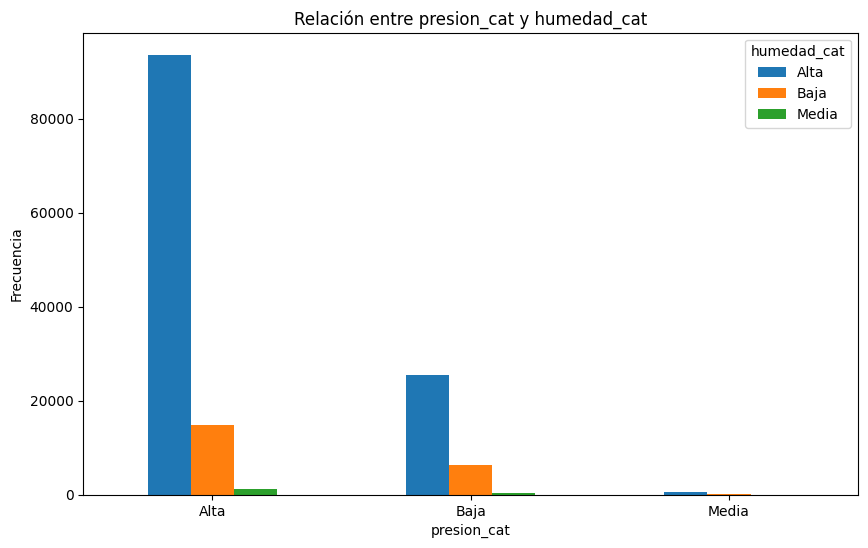

In [49]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(data['presion_cat'], data['humedad_cat'])

# Visualizamos la tabla de contingencia con un gráfico de barras
contingency_table.plot(kind='bar', figsize=(10, 6))
plt.title('Relación entre presion_cat y humedad_cat')
plt.xlabel('presion_cat')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='humedad_cat')
plt.show()

En el gráfico de barras y en el mapa de calor anterior, proporcionamos una exploración visual de la relación entre las categorías de presión y humedad e identificamos un patrón entre las categorías de las dos variables. A menor presión hay una mayor humedad relativa.

**Gráfico de Dispersión entre la humedad, la presión y la posibilidad de lluvia**

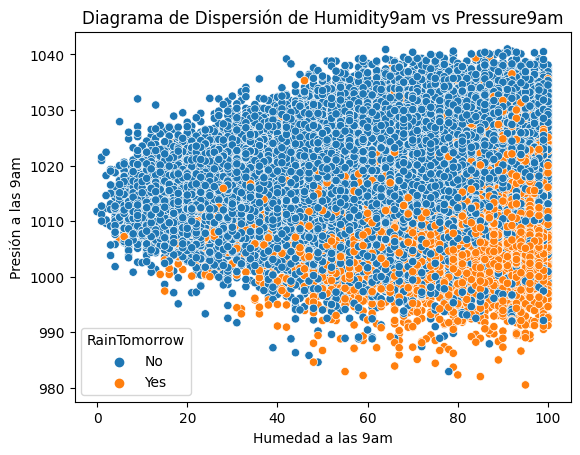

In [50]:
sns.scatterplot(x="Humidity9am", y="Pressure9am", data=data, hue="RainTomorrow")
plt.title('Diagrama de Dispersión de Humidity9am vs Pressure9am')
plt.xlabel('Humedad a las 9am')
plt.ylabel('Presión a las 9am')
plt.show()

En el gráfico de dispersión anterior visualizamos  una relación entre la **humedad**, la **presión** y la **posibilidad de lluvia**.
El color de los puntos indicará si llovió al día siguiente o no. De acuerdo a la literatura climática, una caída de presión cuando viene acompañada de una subida de la humedad relativa, es un hecho claro de que una masa de aire húmeda se acerca y puede estar asociada a un frente de lluvias.

**Matriz de Correlación**

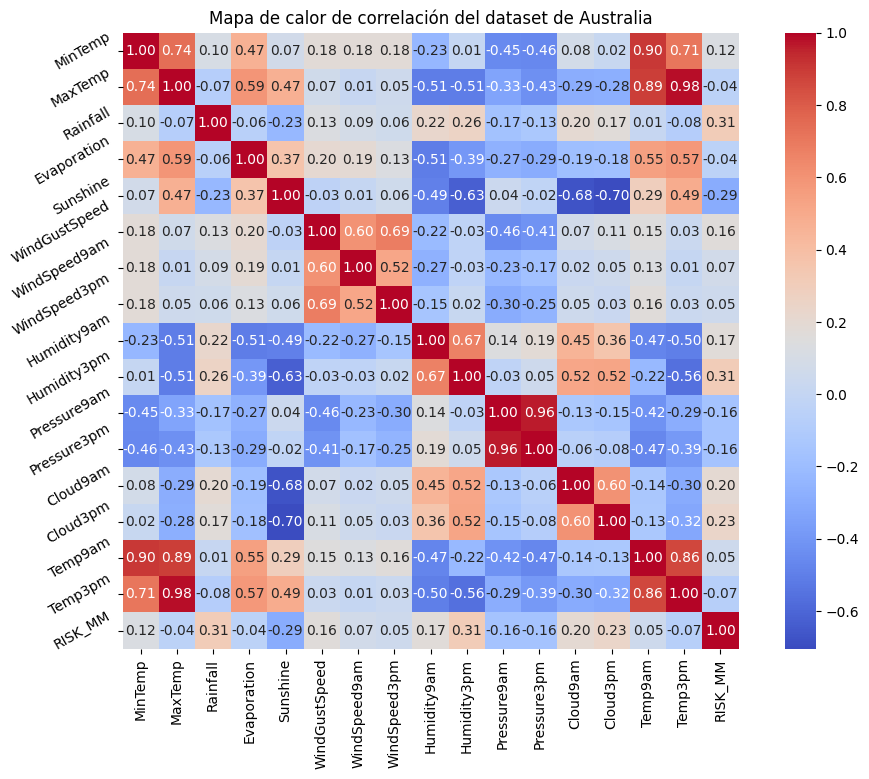

In [51]:
correlation = data.select_dtypes(['float'], ['int']).corr()

plt.figure(figsize=(12,8))
plt.title('Mapa de calor de correlación del dataset de Australia')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white', cmap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()

En la matriz de correlación anterior, analizamos que las variables temperaturas (min-max-9am y 3pm) tienen un alto grado de correlación por lo que trabajaremos sólo con las temperaturas mínimas y máximas. También, notamos que sucede lo mismo con  las variables am y pm de velocidad del viento, humedad, presión y nubosidad, por lo que trabajaremos con las variables de las 9am en todas esas opciones. Para finalizar, tampoco consideraremos las variables de ráfaga de viento porque notamos también una alta correlación con las variables de velocidad del viento.

In [52]:
#Ver el nombre de las columnas
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'Estado',
       'presion_cat', 'humedad_cat'],
      dtype='object')

**Propuestas para las siguientes fases**

- Crearemos un nuevo dataset con las columnas seleccionadas de acuerdo con el mapa de correlación anterior y con el análisis de datos realizado en las fases 1 y 2.

- Con los valores nulos de cada columna numérica se realizará la imputación con la media.

- De acuerdo al análisis de los pasos siguientes, evaluaremos la opción de agregar nuevas columnas.

- En la columna "RainToday", los valores "Yes" y "No" se cambiarán de la siguiente forma: "Yes" a 1 y "No" a 0, y se pondrá la moda que más se repita en los datos nulos.

- Los datos de la columna "RainTomorrow" (llueve mañana) que contienen "Yes" y "No" deberán cambiar a 1 y 0, respectivamente.

- Se realizará balanceo de datos en las variables categóricas.

- Se realizará estandarización de datos en las variables numéricas.

- Las columnas de tipo "Objects" se cambiarán a categóricas, numéricas, fechas, etc., dependiendo de la variable y de lo que se necesite analizar.

- Se imputarán con la moda las variables categóricas.

- KPI Cualitativo: Se buscará un algoritmo que nos ayude a predecir si lloverá en los años posteriores al 2017, fechas que no están registrados en el dataset.

- KPI Cuantitativo: De acuerdo con las correlaciones estudiadas entre las variables de presión, humedad, temperatura, viento, nubosidad y precipitación, y considerando el estudio sobre su impacto en la agricultura, principalmente en el cultivo de trigo, el cual es el principal producto de exportación de Australia y ha sido afectado por la baja de precipitaciones en la última temporada, disminuyendo el rendimiento. Podemos asegurar que, si nuestro modelo alcanza un rendimiento del 75%, será posible mantener la producción de trigo con lluvias moderadas en las principales regiones productoras de Australia, que son Australia Occidental, Western Australia,  South Australia, Victoria, Queensland y Nueva Gales del Sur.

- Se evaluará, de acuerdo a los análisis de los siguientes pasos, volver a replantear los objetivos, KPIs y variables seleccionadas, es decir, regresar a las fases previas.


# Fase 3: Preparación de los datos

- En esta fase se preparán los datos identificando y transformando los valores atipicos e inexistentes, también realizaremos transformaciones de las variables numéricas y categóricas seleccionadas, interpretaremos los resultados e identificaremos insights de alto impacto. 

- Finalmente, agruparemos los datos ya procesados por cada modelo con los que pensamos trabajar en la siguiente etapa: Modelo de Análisis Predictivo - Regresión Lineal con variable objetivo RISK_MM,  Modelo de clasificación - Arbol de decisión para la variable objetivo RainTomorrow y Modelo No Supervisado - K-means con el que analizaremos los grupos que puede tener este dataset.

**Búsqueda de valores inexistentes en el conjunto de datos**

*Creación Variable Season*

- Antes de continuar y de acuerdo con el análisis realizado a nuestro KPI cuantitativo, decidimos transformar la variable Date de tipo datetime a Variable Categórica Nominal basada en las estaciones del año, con el fin de enfocarnos en las fechas claves para el cultivo de trigo donde se requiere mayor cantidad de precipitaciones para una producción óptima.
- Creamos una Función para Mapear las Estaciones
Verano: Diciembre a Febrero
Otoño: Marzo a Mayo
Invierno: Junio a Agosto
Primavera: Septiembre a Noviembre

In [53]:
#Creamos una Función para Mapear las Estaciones en base al dataset original
def get_season(month):
    if month in [12, 1, 2]:  # Verano
        return 'Verano'
    elif month in [3, 4, 5]:  # Otoño
        return 'Otoño'
    elif month in [6, 7, 8]:  # Invierno
        return 'Invierno'
    elif month in [9, 10, 11]:  # Primavera
        return 'Primavera'

# Extrae el mes de la columna 'Date'
data['Month'] = data['Date'].dt.month

# Aplica la función para obtener la estación basada en el mes
data['Season'] = data['Month'].apply(get_season)

# Imprimir las primeras filas para asegurar que la columna 'Season' se ha añadido correctamente
print(data[['Date', 'Season']].head())

        Date  Season
0 2008-12-01  Verano
1 2008-12-02  Verano
2 2008-12-03  Verano
3 2008-12-04  Verano
4 2008-12-05  Verano


In [54]:
#Cantidad de los Valores de cada estación
data['Season'].value_counts()

Season
Otoño        37397
Invierno     35930
Primavera    34610
Verano       34256
Name: count, dtype: int64

*Eliminamos la variable date porque será reemplazada por la nueva variable Season y creamos un nuevo dataframe con las variables que utilizaremos en los modelos.

In [55]:
# Se crea un nuevo DataFrame con columnas seleccionadas
data_subset = data[['Estado', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindDir3pm',
                    'WindSpeed3pm', 'Humidity3pm', 'Pressure3pm', 'RainToday',
                    'RainTomorrow', 'Season']].copy()

In [56]:
# Mostramos el número de valores faltantes de cada columna
for columna in data_subset:
    num_faltantes = data_subset[columna].isnull().sum()
    print(f"Columna '{columna}': {num_faltantes} valores faltantes")

Columna 'Estado': 49434 valores faltantes
Columna 'MinTemp': 637 valores faltantes
Columna 'MaxTemp': 322 valores faltantes
Columna 'Rainfall': 1406 valores faltantes
Columna 'WindDir3pm': 3778 valores faltantes
Columna 'WindSpeed3pm': 2630 valores faltantes
Columna 'Humidity3pm': 3610 valores faltantes
Columna 'Pressure3pm': 13981 valores faltantes
Columna 'RainToday': 1406 valores faltantes
Columna 'RainTomorrow': 0 valores faltantes
Columna 'Season': 0 valores faltantes


In [57]:
#Se imputan los valores nulos  de las columnas númericas por la mediana,

data_subset['Rainfall'].fillna(data_subset['Rainfall'].median(), inplace=True)
data_subset['MinTemp'].fillna(data_subset['MinTemp'].median(), inplace=True)
data_subset['MaxTemp'].fillna(data_subset['MaxTemp'].median(), inplace=True)
data_subset['WindSpeed3pm'].fillna(data_subset['WindSpeed3pm'].median(), inplace=True)
data_subset['Humidity3pm'].fillna(data_subset['Humidity3pm'].median(), inplace=True)
data_subset['Pressure3pm'].fillna(data_subset['Pressure3pm'].median(), inplace=True)


<ipython-input-57-3f79f31b3d5b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_subset['Rainfall'].fillna(data_subset['Rainfall'].median(), inplace=True)
<ipython-input-57-3f79f31b3d5b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

Elegimos la imputación de la mediana, en vez del promedio, para representar de mejor manera los datos centrales y evitar variaciones debido a valores atípicos o distribución sesgada.

In [58]:
#Se imputan los valores nulos  de las columnas categoricas por la moda

data_subset['WindDir3pm'].fillna(data_subset['WindDir3pm'].mode()[0], inplace=True)
data_subset['RainToday'].fillna(data_subset['RainToday'].mode()[0], inplace=True)
data_subset['Estado'].fillna(data_subset['Estado'].mode()[0], inplace=True)

<ipython-input-58-3b3ddbd89cea>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_subset['WindDir3pm'].fillna(data_subset['WindDir3pm'].mode()[0], inplace=True)
<ipython-input-58-3b3ddbd89cea>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

En las columnas categóricas imputamos con la moda, ya que es una elección frecuente, principalmente en una columna que no posee mucho porcentaje de nulos, la cual ayuda a preservar la integridad de los datos y garantiza que los análisis posteriores se basen en una representación realista del conjunto de datos original.

In [59]:
# Verificamos el número de valores faltantes de cada columna
for columna in data_subset:
    num_faltantes = data_subset[columna].isnull().sum()
    print(f"Columna '{columna}': {num_faltantes} valores faltantes")

Columna 'Estado': 0 valores faltantes
Columna 'MinTemp': 0 valores faltantes
Columna 'MaxTemp': 0 valores faltantes
Columna 'Rainfall': 0 valores faltantes
Columna 'WindDir3pm': 0 valores faltantes
Columna 'WindSpeed3pm': 0 valores faltantes
Columna 'Humidity3pm': 0 valores faltantes
Columna 'Pressure3pm': 0 valores faltantes
Columna 'RainToday': 0 valores faltantes
Columna 'RainTomorrow': 0 valores faltantes
Columna 'Season': 0 valores faltantes


**Detección de valores atípicos en los datos** 

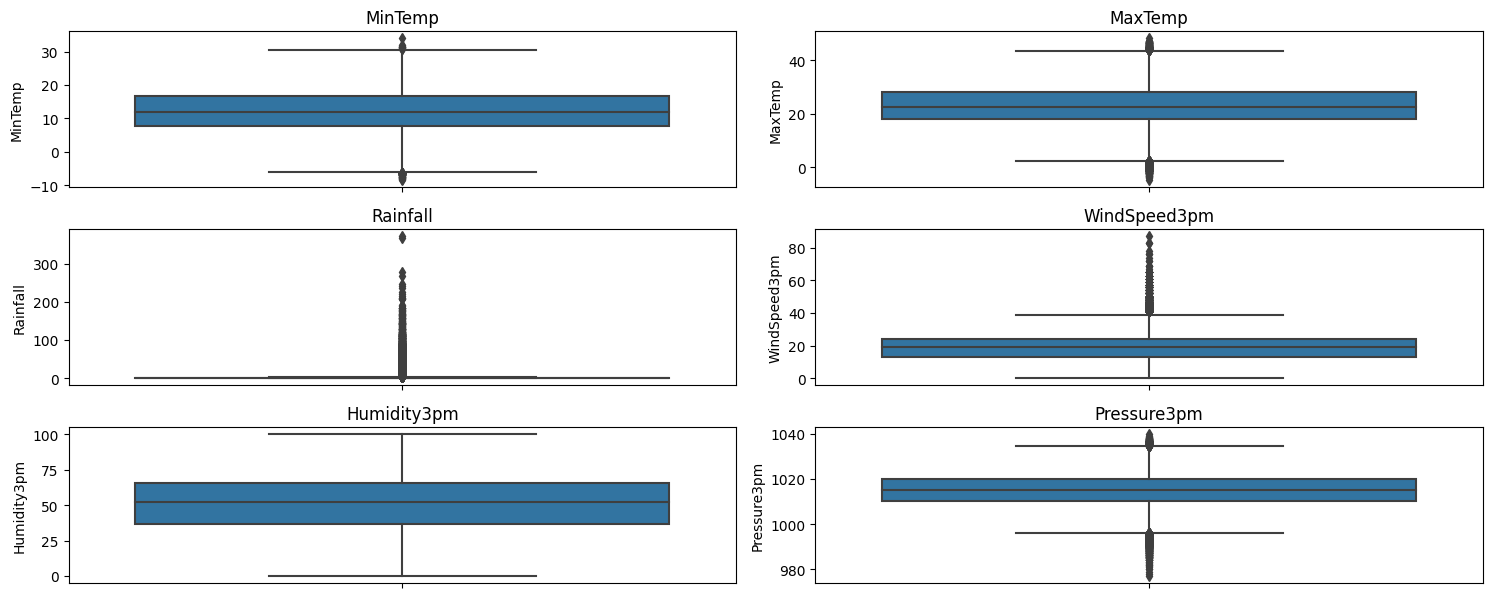

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las columnas numéricas
numeric_columns = data_subset.select_dtypes(include=['float64']).columns

# Dividimos en grupos de 10
chunk_size = 10
num_chunks = len(numeric_columns) // chunk_size + 1

for chunk in range(num_chunks):
    start = chunk * chunk_size
    end = (chunk + 1) * chunk_size
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(numeric_columns[start:end], 1):
        plt.subplot(5, 2, i)
        sns.boxplot(y=data[column])
        plt.title(column)
    plt.tight_layout()
    plt.show()

En los gráficos anteriores podemos analizar y detectar que existen datos atípicos MinTemp, MaxTemp, 'Rainfall', 'WindSpeed3pm', 'Pressure3pm', 'RISK_MM'. Para visualizar y corroborar se realizará la comparación con gráfico z-score en esas variables.

*A continuación separamos los datos numéricos y categóricos

In [61]:
#Verificamos cuáles variables son categoricas y cuáles son númericas
categorical = [var for var in data_subset.columns if data_subset[var].dtype =='O']

Numerical = [var for var  in data_subset.columns if data_subset[var].dtype !='O' ]


print('Hay {} categorical variables\nSus nombres son: {}\n'.format(len(categorical),categorical))

print('Hay {} numerical variables\nSus nombres son: {}'.format(len(Numerical),Numerical))

Hay 5 categorical variables
Sus nombres son: ['Estado', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Season']

Hay 6 numerical variables
Sus nombres son: ['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed3pm', 'Humidity3pm', 'Pressure3pm']


In [62]:
# Mostramos las columnas del nuevo dataset
data_subset.head()

Estado  MinTemp  MaxTemp  Rainfall WindDir3pm  WindSpeed3pm  \
0  Nueva Gales del Sur     13.4     22.9       0.6        WNW          24.0   
1  Nueva Gales del Sur      7.4     25.1       0.0        WSW          22.0   
2  Nueva Gales del Sur     12.9     25.7       0.0        WSW          26.0   
3  Nueva Gales del Sur      9.2     28.0       0.0          E           9.0   
4  Nueva Gales del Sur     17.5     32.3       1.0         NW          20.0   

   Humidity3pm  Pressure3pm RainToday RainTomorrow  Season  
0         22.0       1007.1        No           No  Verano  
1         25.0       1007.8        No           No  Verano  
2         30.0       1008.7        No           No  Verano  
3         16.0       1012.8        No           No  Verano  
4         33.0       1006.0        No           No  Verano

**Preparación de las Variables Categóricas**

*En los siguientes códigos, analizaremos cada variable categórica y luego las transformaremos a variables numéricas con la técnica LabelEncoder. Las Variables son:'Estado', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Season'*

In [63]:
#Análisis y Conteo de cada categoría de variable Estado
data_subset["Estado"].groupby(data_subset.Estado).count().sort_values()

Estado
Australia del Sur                        5992
Tasmania                                 6216
Territorio del Norte                     6272
Territorio de la Capital Australiana     6416
Queensland                               9182
Australia Occidental                    11980
Nueva Gales del Sur                     23259
Victoria                                72876
Name: Estado, dtype: int64

In [64]:
#Análisis y Conteo de cada categoría de variable WindDir3pm (Dirección del viento a las 3pm) 
data_subset["WindDir3pm"].groupby(data_subset.WindDir3pm).count().sort_values()

WindDir3pm
NNE     6444
ENE     7724
NNW     7733
SSW     8010
NE      8164
E       8342
ESE     8382
NW      8468
WNW     8656
N       8667
SSE     9142
SW      9182
WSW     9329
S       9598
W       9911
SE     14441
Name: WindDir3pm, dtype: int64

In [65]:
#Análisis y Conteo de cada categoría de variable RainToday
data_subset["RainToday"].groupby(data_subset.RainToday).count().sort_values()

RainToday
Yes     31455
No     110738
Name: RainToday, dtype: int64

In [66]:
#Análisis y Conteo de cada categoría de variable RainTomorrow
data_subset["RainTomorrow"].groupby(data_subset.RainTomorrow).count().sort_values()

RainTomorrow
Yes     31877
No     110316
Name: RainTomorrow, dtype: int64

In [67]:
#Análisis y Conteo de cada categoría de variable Season
data_subset["Season"].groupby(data_subset.Season).count().sort_values()

Season
Verano       34256
Primavera    34610
Invierno     35930
Otoño        37397
Name: Season, dtype: int64

*Aplicaremos LabelEncoder para convertir etiquetas categóricas en números enteros*

In [68]:
# LabelEncoder en Variable Estado
from sklearn.preprocessing import LabelEncoder

# Creamos un objeto LabelEncoder
label_encoder_estado = LabelEncoder()

# Ajustamos y transformamos los datos, reemplazando la columna actual
data_subset['Estado'] = label_encoder_estado.fit_transform(data_subset['Estado'])

# Vemos el DataFrame resultante
print(data_subset.head())

# Vemos las clases y sus codificaciones
print("\nClases y sus codificaciones:")
for class_label, class_index in zip(label_encoder_estado.classes_, range(len(label_encoder_estado.classes_))):
    print(f"{class_label}: {class_index}")

   Estado  MinTemp  MaxTemp  Rainfall WindDir3pm  WindSpeed3pm  Humidity3pm  \
0       2     13.4     22.9       0.6        WNW          24.0         22.0   
1       2      7.4     25.1       0.0        WSW          22.0         25.0   
2       2     12.9     25.7       0.0        WSW          26.0         30.0   
3       2      9.2     28.0       0.0          E           9.0         16.0   
4       2     17.5     32.3       1.0         NW          20.0         33.0   

   Pressure3pm RainToday RainTomorrow  Season  
0       1007.1        No           No  Verano  
1       1007.8        No           No  Verano  
2       1008.7        No           No  Verano  
3       1012.8        No           No  Verano  
4       1006.0        No           No  Verano  

Clases y sus codificaciones:
Australia Occidental: 0
Australia del Sur: 1
Nueva Gales del Sur: 2
Queensland: 3
Tasmania: 4
Territorio de la Capital Australiana: 5
Territorio del Norte: 6
Victoria: 7


In [69]:
print(data_subset['Estado'].isnull().sum()) # se comprueba que no hay ningún valor NaN despúes del mapeo.

0


Antes de aplicar LabelEncoder en Variable WindDir3pm disminuimos sus categorías

In [70]:
#Simplificamos las categorías de la variable WindDir3pm
import pandas as pd

# Definimos el diccionario de mapeo
wind_dir_mapping = {
    'N': 'N',
    'NNE': 'N', 'NE': 'NE', 'ENE': 'E',
    'E': 'E', 'ESE': 'E', 'SE': 'SE', 'SSE': 'S',
    'S': 'S', 'SSW': 'S', 'SW': 'SW', 'WSW': 'W',
    'W': 'W', 'WNW': 'W', 'NW': 'NW', 'NNW': 'N'
}

# Aplicamos el mapeo y reemplazar la columna WindDir3pm
data_subset['WindDir3pm'] = data_subset['WindDir3pm'].map(wind_dir_mapping)

In [71]:
#Comprobamos el mapeo
data_subset["WindDir3pm"].groupby(data_subset.WindDir3pm).count().sort_values()

WindDir3pm
NE     8164
NW     8468
SW     9182
SE    14441
N     22844
E     24448
S     26750
W     27896
Name: WindDir3pm, dtype: int64

In [72]:
# LabelEncoder en Variable WindDir3pm
from sklearn.preprocessing import LabelEncoder

# Creamos un objeto LabelEncoder
label_encoder_wind = LabelEncoder()

# Ajustamos y transformamos los datos, reemplazando la columna actual
data_subset['WindDir3pm'] = label_encoder_wind.fit_transform(data_subset['WindDir3pm'])

# Vemos el DataFrame resultante
print(data_subset.head())

# Vemos las clases y sus codificaciones
print("\nClases y sus codificaciones:")
for class_label, class_index in zip(label_encoder_wind.classes_, range(len(label_encoder_wind.classes_))):
    print(f"{class_label}: {class_index}")

   Estado  MinTemp  MaxTemp  Rainfall  WindDir3pm  WindSpeed3pm  Humidity3pm  \
0       2     13.4     22.9       0.6           7          24.0         22.0   
1       2      7.4     25.1       0.0           7          22.0         25.0   
2       2     12.9     25.7       0.0           7          26.0         30.0   
3       2      9.2     28.0       0.0           0           9.0         16.0   
4       2     17.5     32.3       1.0           3          20.0         33.0   

   Pressure3pm RainToday RainTomorrow  Season  
0       1007.1        No           No  Verano  
1       1007.8        No           No  Verano  
2       1008.7        No           No  Verano  
3       1012.8        No           No  Verano  
4       1006.0        No           No  Verano  

Clases y sus codificaciones:
E: 0
N: 1
NE: 2
NW: 3
S: 4
SE: 5
SW: 6
W: 7


In [73]:
print(data_subset['WindDir3pm'].isnull().sum()) # se comprueba que no hay ningún valor NaN despúes del mapeo.

0


In [74]:
# LabelEncoder en Variable RainToday
from sklearn.preprocessing import LabelEncoder

# Creamos un objeto LabelEncoder
label_encoder_raintoday = LabelEncoder()

# Ajustamos y transformamos los datos, reemplazando la columna actual
data_subset['RainToday'] = label_encoder_raintoday.fit_transform(data_subset['RainToday'])

# Vemos el DataFrame resultante
print(data_subset.head())

# Vemos las clases y sus codificaciones
print("\nClases y sus codificaciones:")
for class_label, class_index in zip(label_encoder_raintoday.classes_, range(len(label_encoder_raintoday.classes_))):
    print(f"{class_label}: {class_index}")

   Estado  MinTemp  MaxTemp  Rainfall  WindDir3pm  WindSpeed3pm  Humidity3pm  \
0       2     13.4     22.9       0.6           7          24.0         22.0   
1       2      7.4     25.1       0.0           7          22.0         25.0   
2       2     12.9     25.7       0.0           7          26.0         30.0   
3       2      9.2     28.0       0.0           0           9.0         16.0   
4       2     17.5     32.3       1.0           3          20.0         33.0   

   Pressure3pm  RainToday RainTomorrow  Season  
0       1007.1          0           No  Verano  
1       1007.8          0           No  Verano  
2       1008.7          0           No  Verano  
3       1012.8          0           No  Verano  
4       1006.0          0           No  Verano  

Clases y sus codificaciones:
No: 0
Yes: 1


In [75]:
print(data_subset['RainToday'].isnull().sum()) # se comprueba que no hay ningún valor NaN despúes del mapeo.

0


In [76]:
# LabelEncoder en Variable RainTomorrow
from sklearn.preprocessing import LabelEncoder

# Creamos un objeto LabelEncoder
label_encoder_raintomorr = LabelEncoder()

# Ajustamos y transformamos los datos, reemplazando la columna actual
data_subset['RainTomorrow'] = label_encoder_raintomorr.fit_transform(data_subset['RainTomorrow'])

# Vemos el DataFrame resultante
print(data_subset.head())

# Vemos las clases y sus codificaciones
print("\nClases y sus codificaciones:")
for class_label, class_index in zip(label_encoder_raintomorr.classes_, range(len(label_encoder_raintomorr.classes_))):
    print(f"{class_label}: {class_index}")

   Estado  MinTemp  MaxTemp  Rainfall  WindDir3pm  WindSpeed3pm  Humidity3pm  \
0       2     13.4     22.9       0.6           7          24.0         22.0   
1       2      7.4     25.1       0.0           7          22.0         25.0   
2       2     12.9     25.7       0.0           7          26.0         30.0   
3       2      9.2     28.0       0.0           0           9.0         16.0   
4       2     17.5     32.3       1.0           3          20.0         33.0   

   Pressure3pm  RainToday  RainTomorrow  Season  
0       1007.1          0             0  Verano  
1       1007.8          0             0  Verano  
2       1008.7          0             0  Verano  
3       1012.8          0             0  Verano  
4       1006.0          0             0  Verano  

Clases y sus codificaciones:
No: 0
Yes: 1


In [77]:
print(data_subset['RainTomorrow'].isnull().sum()) # se comprueba que no hay ningún valor NaN despúes del mapeo.

0


In [78]:
# LabelEncoder en Variable Season
from sklearn.preprocessing import LabelEncoder

# Creamos un objeto LabelEncoder
label_encoder_season = LabelEncoder()

# Ajustamos y transformamos los datos, reemplazando la columna actual
data_subset['Season'] = label_encoder_season.fit_transform(data_subset['Season'])

# Vemos el DataFrame resultante
print(data_subset.head())

# Vemos las clases y sus codificaciones
print("\nClases y sus codificaciones:")
for class_label, class_index in zip(label_encoder_season.classes_, range(len(label_encoder_season.classes_))):
    print(f"{class_label}: {class_index}")

   Estado  MinTemp  MaxTemp  Rainfall  WindDir3pm  WindSpeed3pm  Humidity3pm  \
0       2     13.4     22.9       0.6           7          24.0         22.0   
1       2      7.4     25.1       0.0           7          22.0         25.0   
2       2     12.9     25.7       0.0           7          26.0         30.0   
3       2      9.2     28.0       0.0           0           9.0         16.0   
4       2     17.5     32.3       1.0           3          20.0         33.0   

   Pressure3pm  RainToday  RainTomorrow  Season  
0       1007.1          0             0       3  
1       1007.8          0             0       3  
2       1008.7          0             0       3  
3       1012.8          0             0       3  
4       1006.0          0             0       3  

Clases y sus codificaciones:
Invierno: 0
Otoño: 1
Primavera: 2
Verano: 3


In [79]:
print(data_subset['Season'].isnull().sum()) # se comprueba que no hay ningún valor NaN despúes del mapeo.

0


**Preparación de las Variables Numéricas**

Para la preparación de las variables numéricas ocupamos la herramienta "StandardScaler" que estandariza las características eliminando la media y escalando a una varianza unitaria. Esta técnica es especialmente útil para optimizar el rendimiento de los algoritmos de machine learning, ya que muchos de ellos asumen que todas las características están centradas alrededor de cero y tienen una varianza en la misma escala.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


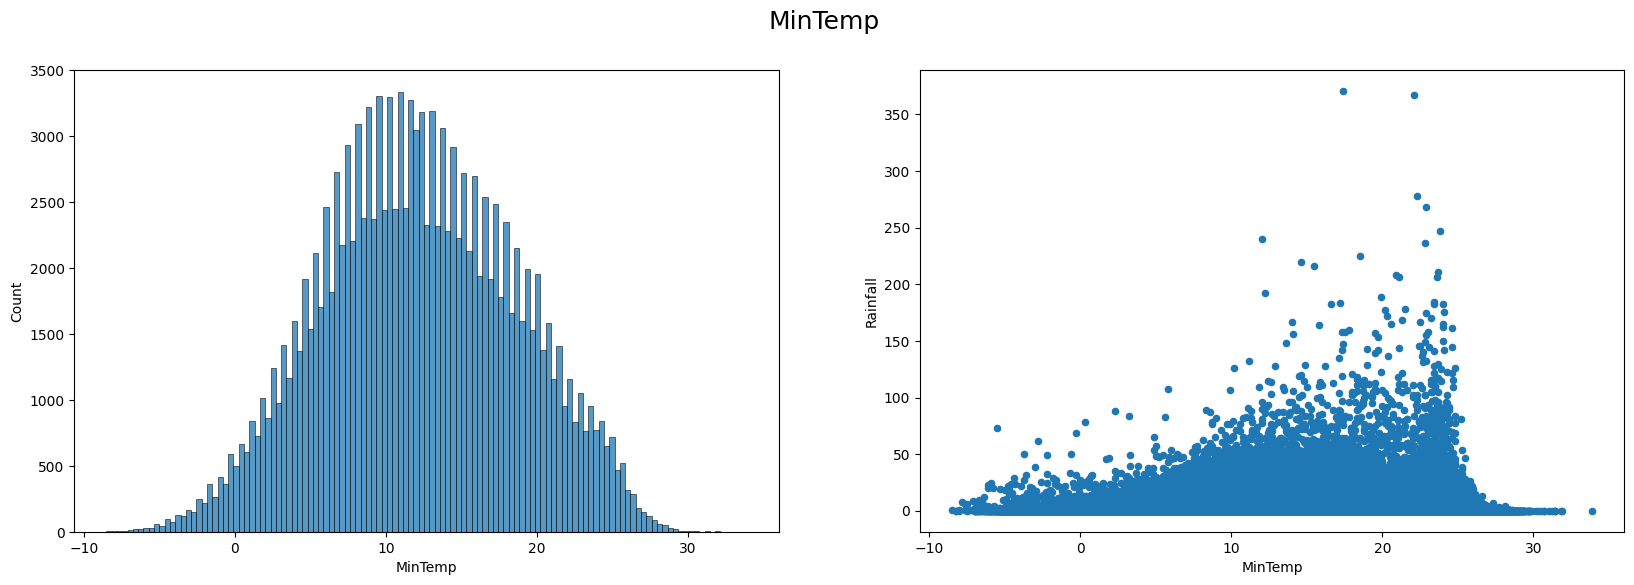

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


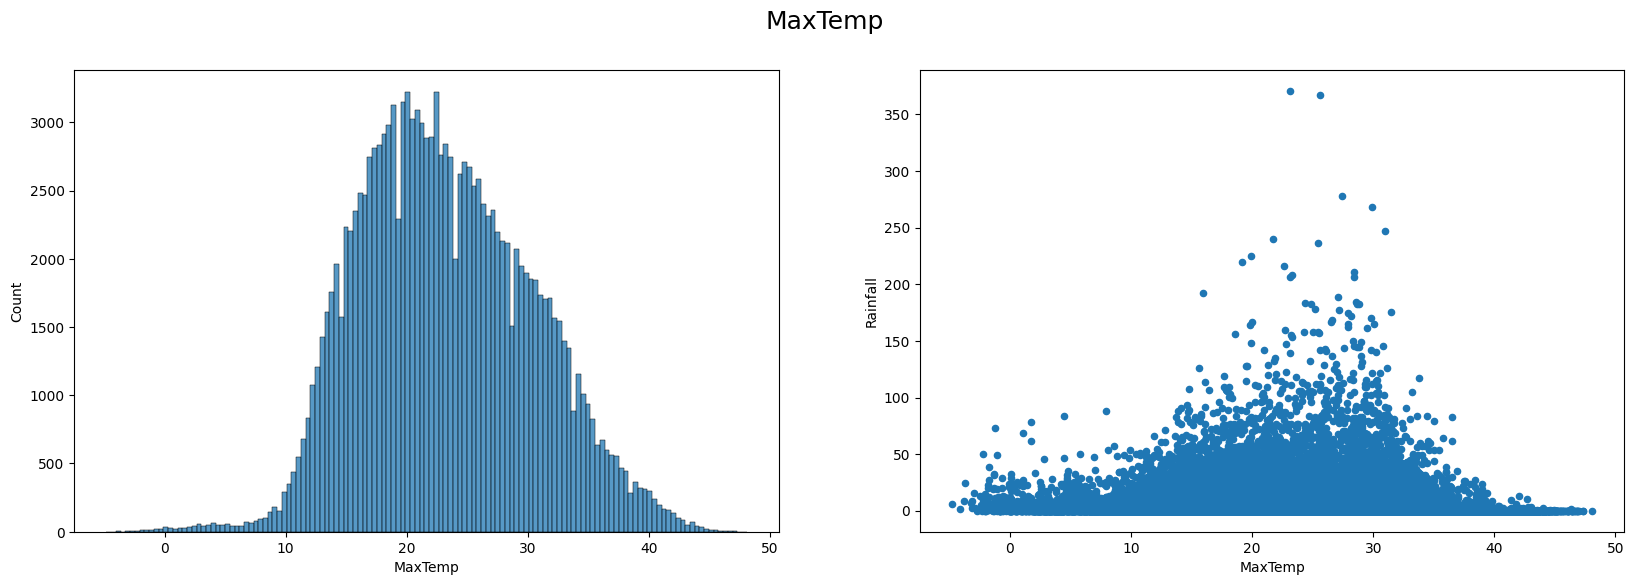

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


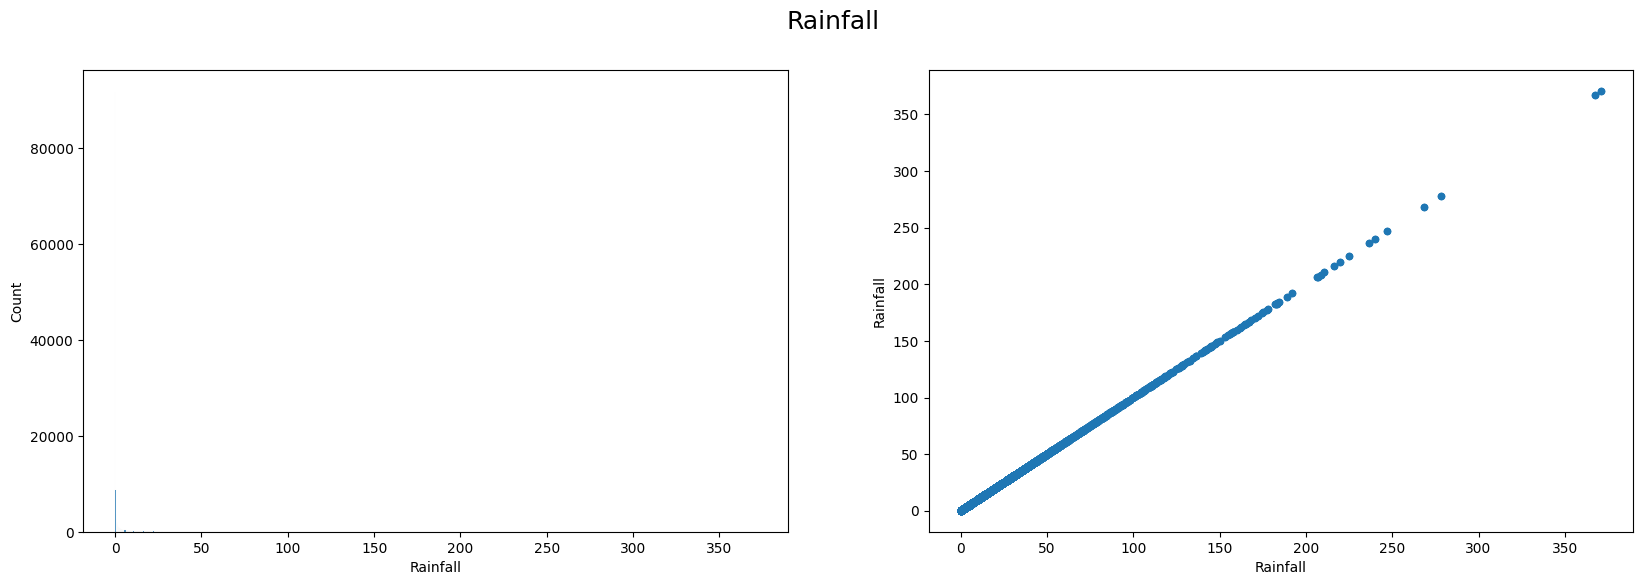

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


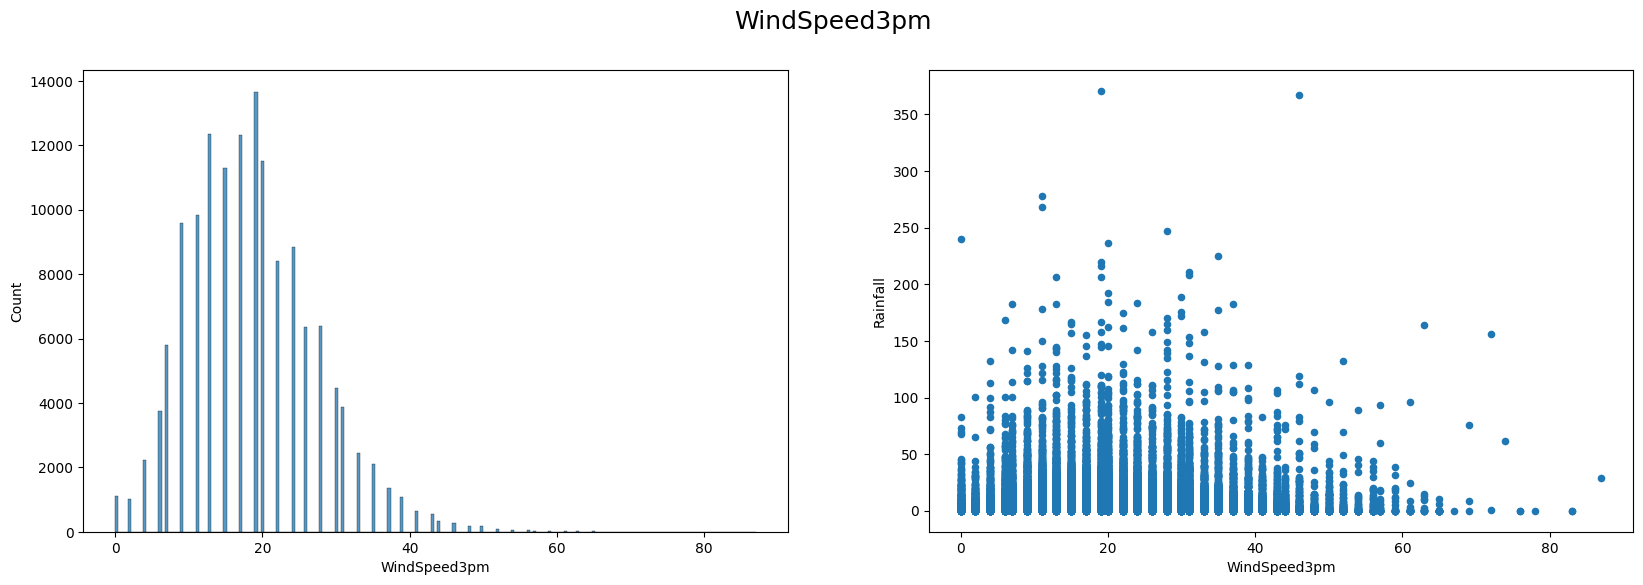

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


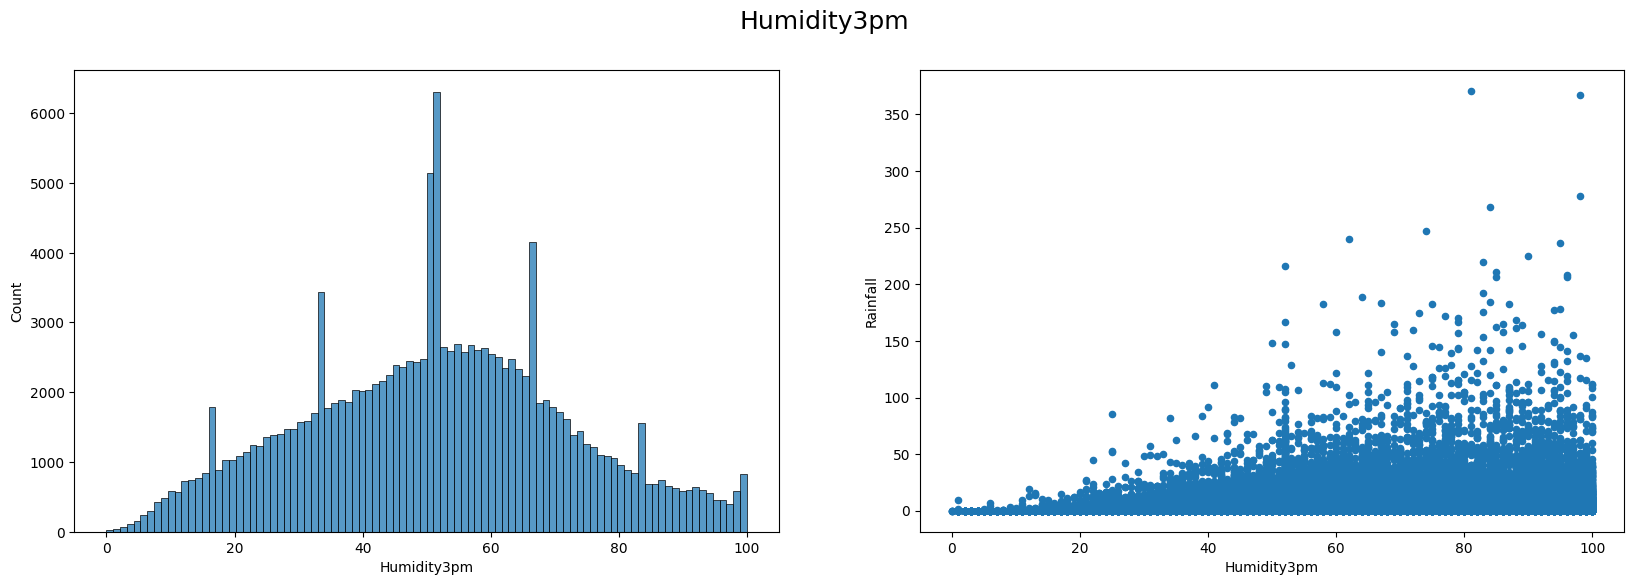

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


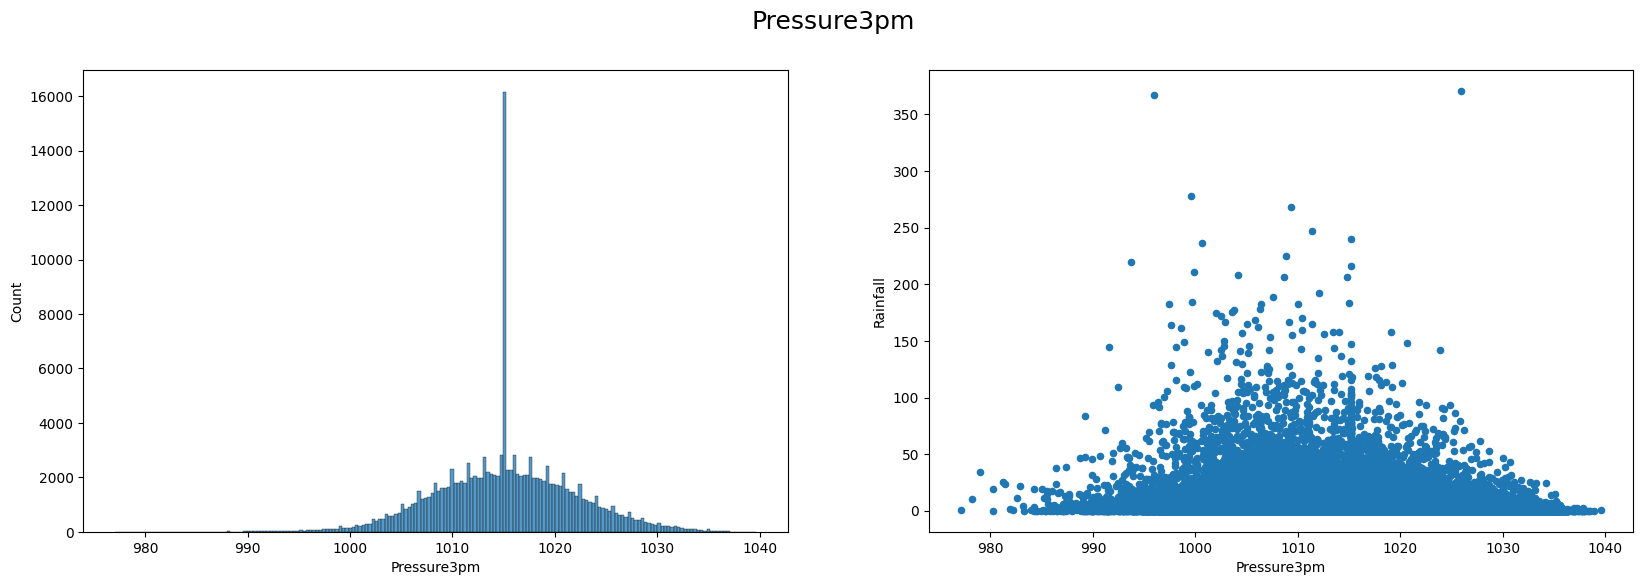

In [80]:
#Visualizamos las relaciones y distribuciones de las variables numéricas estandarizadas y la relacionamos con Rainfall
for col in numeric_columns:
    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.histplot(data_subset[col], ax=ax[0])
    data_subset[[col]+['Rainfall']].plot.scatter(x=col, y='Rainfall', ax=ax[1])
    plt.show()

In [81]:
# Importamos StandardScaler de sklearn.preprocessing para estandarizar las variables numéricas
from sklearn.preprocessing import StandardScaler

#Seleccionamos las variables numéricas 
numeric_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed3pm', 'Humidity3pm', 'Pressure3pm']


# Crear una instancia de StandardScaler
sc = StandardScaler()

# Ajustamos y transformamos los datos numéricos utilizando StandardScaler
scaled_data = sc.fit_transform(data_subset[numeric_columns])

# Convertir los datos escalados en un DataFrame y asignar nombres de columnas
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

# Reemplazar las columnas originales con las escaladas en el DataFrame original
for col in numeric_columns:
    data_subset[col] = scaled_df[col]

# Verificar los cambios
print(data_subset.head())

   Estado   MinTemp   MaxTemp  Rainfall  WindDir3pm  WindSpeed3pm  \
0       2  0.190085 -0.045764 -0.204920           7      0.614071   
1       2 -0.749042  0.263677 -0.276125           7      0.384757   
2       2  0.111824  0.348070 -0.276125           7      0.843386   
3       2 -0.467304  0.671577 -0.276125           0     -1.105785   
4       2  0.831821  1.276393 -0.157450           3      0.155443   

   Humidity3pm  Pressure3pm  RainToday  RainTomorrow  Season  
0    -1.436563    -1.220105          0             0       3  
1    -1.290451    -1.115343          0             0       3  
2    -1.046931    -0.980648          0             0       3  
3    -1.728788    -0.367040          0             0       3  
4    -0.900818    -1.384732          0             0       3  


Con fit_transform primero se calcula la media y la desviación estándar de cada columna (fit) y luego usa esos valores para transformar los datos, de manera que cada característica tenga una media de cero y una desviación estándar de uno (transform).
Convertimos los datos escalados, que son un array NumPy, de nuevo a un DataFrame de Pandas para facilitar la manipulación y visualización.

##### Balanceo variable categórica objetivo "RainTomorrow" para los datos de entrenamiento si aplica

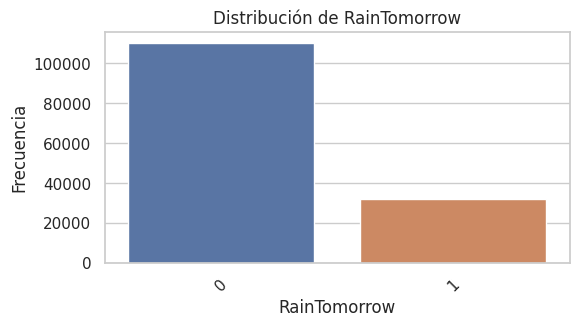

In [82]:
# Verificamos el balance de la carga de la variable "RainTomorrow" que es nuestra variable objetivo
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
rain_tomorrow_counts = data_subset['RainTomorrow'].value_counts()

plt.figure(figsize=(6, 3))
sns.barplot(x=rain_tomorrow_counts.index, y=rain_tomorrow_counts.values)
plt.title('Distribución de RainTomorrow')
plt.ylabel('Frecuencia')
plt.xlabel('RainTomorrow')
plt.xticks(rotation=45)
plt.show()

Se propone realizar el balance de la variable target sólo en los datos de entrenamiento si es que el resultado de los modelos es menor al 70% por varias razones:

Evitar la Contaminación de Datos de Prueba: Objetividad de la Evaluación: Los datos de prueba deben reflejar de manera precisa la distribución real de las clases en el mundo real. Alterar la distribución de las clases en los datos de prueba podría llevar a una evaluación sesgada del rendimiento del modelo.
Entrenamiento Eficaz: Mejora del Aprendizaje del Modelo: Al balancear los datos de entrenamiento, se asegura que el modelo tenga suficientes ejemplos de cada clase para aprender patrones significativos y no se sesgue hacia la clase mayoritaria.
Métricas de Evaluación Más Realistas: Evaluación Precisa: Utilizar datos de prueba con la distribución original de las clases permite obtener métricas de evaluación (como precisión, recall, F1-score, etc.) que reflejan mejor el rendimiento del modelo en un entorno real.
Simulación de Escenarios del Mundo Real: Condiciones Realistas: En producción, los datos con los que se enfrentará el modelo no estarán balanceados. Evaluar el modelo en datos de prueba desbalanceados ayuda a simular las condiciones reales y verificar si el modelo puede manejar eficazmente estas condiciones.
Prevención de Optimismo Engañoso: Métricas Infladas: Balancear los datos de prueba puede llevar a métricas de rendimiento infladas y optimismo engañoso sobre la capacidad del modelo, ya que no reflejan la distribución de las clases en un entorno de producción.

# Fase 4: Modelado

En esta fase, los datos preprocesados y transformados serán utilizados para construir y evaluar 4 modelos de aprendizaje supervisado: 2 modelos de regresión (Regresión Lineal Múltiple y Árbol de Regresión) y 2 modelos de clasificación (Árbol de Decisión y Naive Bayes). Además, se agregarán interpretaciones de los resultados obtenidos de acuerdo con las características del caso y de nuestros objetivos.

***Objetivos planteados:***

- KPI Cualitativo: Se buscará un algoritmo que nos ayude a predecir si lloverá o no en los años posteriores al 2017, fechas que no han sido registradas en el dataset.

- KPI Cuantitativo: De acuerdo con las correlaciones estudiadas entre las variables de presión, humedad, temperatura, viento, nubosidad y precipitación, y considerando el estudio sobre su impacto en la agricultura, principalmente en el cultivo de trigo, el cual es el principal producto de exportación de Australia y ha sido afectado por la baja de precipitaciones en la última temporada, disminuyendo el rendimiento. Podemos asegurar que, si nuestro modelo alcanza un rendimiento mínimo del 75%, será posible mantener la producción de trigo con lluvias moderadas en las principales regiones productoras de Australia, que son Australia Occidental, Western Australia, South Australia, Victoria, Queensland y Nueva Gales del Sur.

## *Modelo de Regresión lineal múltiple*
- En este análisis, utilizamos un modelo de análisis predictivo para predecir MaxTemp, es decir, la temperatura máxima de cada registro. Este valor es crucial para una variedad de aplicaciones, desde la planificación agrícola hasta la gestión de recursos hídricos y la preparación para condiciones meteorológicas adversas.
- El modelo de regresión lineal es una de las herramientas estadísticas más fundamentales y comúnmente utilizadas en análisis predictivo. Este modelo asume que existe una relación lineal entre las variables independientes y la variable dependiente. El propósito es ajustar una línea o un hiperplano que reduzca al mínimo la suma de los errores cuadrados, permitiendo así predecir la variable dependiente a partir de las variables independientes.

In [83]:
# Importamos las librerías
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [84]:
#Seleccionamos las variables independientes y la dependiente

# Variables independientes
X = data_subset.drop(columns=['MaxTemp'])

# Variable dependiente
y = data_subset['MaxTemp']

In [85]:
# Dividimos el conjunto de datos en subconjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

*Explicación de la separación de los datos en el modelo:
- X_train, X_test: Estos son los subconjuntos de las variables independientes (features) para entrenamiento y prueba, respectivamente.
- y_train, y_test: Estos son los subconjuntos de la variable dependiente ('MaxTemp' en este caso) para entrenamiento y prueba, respectivamente.
- train_test_split: Es una función de la biblioteca scikit-learn que divide los datos en subconjuntos aleatorios de entrenamiento y prueba.
- test_size=0.2: Este parámetro especifica que el 20% del conjunto de datos se utilizará como conjunto de prueba, mientras que el 80% restante se utilizará para el entrenamiento.
- random_state=29: Este parámetro es utilizado para asegurar la reproducibilidad de la división exacta de los datos cada vez que se ejecuta el código. Al fijar este número, cualquier persona que ejecute este código obtendrá la misma división exacta, lo que es crucial para experimentos reproducibles.

In [86]:
# Creamos el objeto // 
#Este objeto contendrá todos los métodos y atributos necesarios para ajustar el modelo a los datos y hacer predicciones.
lr = LinearRegression()

# Ajustamos (entrenamos) el modelo a los datos de entrenamiento
lr.fit(X_train, y_train)

# Hacemos predicciones con el conjunto de datos de test
y_pred = lr.predict(X_test)

In [87]:
# Imprimimos los coeficientes y el intercepto
print(lr.intercept_)
print(lr.coef_)

-0.017756244371480743
[ 0.00090415  0.65761464  0.01194126 -0.02497657 -0.0804588  -0.44990384
 -0.08159557 -0.22370242  0.01224878  0.09976473]


lr.intercept_: Imprime el valor del intercepto del modelo, que es el valor predicho de la variable dependiente cuando todas las variables independientes son cero.

lr.coef_: Imprime los coeficientes del modelo, que representan el cambio en la variable dependiente por cada unidad de cambio en la variable independiente correspondiente.

Estos valores son cruciales para interpretar el modelo de regresión lineal y entender cómo las variables independientes afectan a la variable dependiente.

### Evaluación del modelo (visualización)
#### Visualizamos el dato real contra la predicción

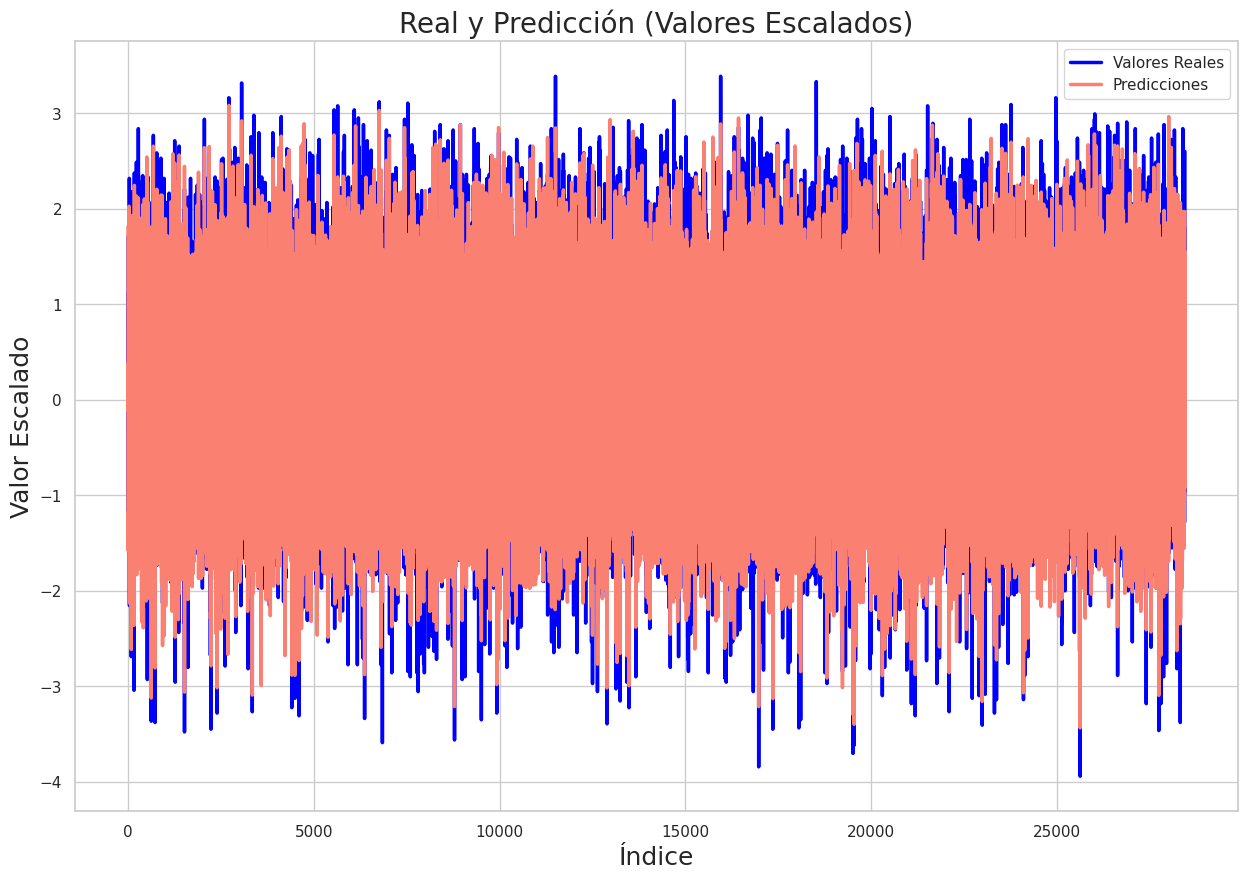

In [88]:
import matplotlib.pyplot as plt

# X_test, y_test y y_pred están escalados
# Real contra predicción
plt.figure(figsize=(15, 10))

# Generar índice
c = [i for i in range(1, len(X_test) + 1)]

# Graficar valores reales y predicciones
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-", label="Valores Reales")
plt.plot(c, y_pred, color="salmon", linewidth=2.5, linestyle="-", label="Predicciones")

# Añadir título y etiquetas
plt.title('Real y Predicción (Valores Escalados)', fontsize=20)
plt.xlabel('Índice', fontsize=18)
plt.ylabel('Valor Escalado', fontsize=18)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

### Métricas de Evaluación

### MAE (Error Absoluto Medio)

In [89]:
import sklearn.metrics as metrics

mae_mult = metrics.mean_absolute_error(y_test, y_pred)
print(f"MAE (Regresión Múltiple): {mae_mult}")

MAE (Regresión Múltiple): 0.3293856830584875


El valor del MAE es relativamente bajo. Este valor indica que, en promedio, las predicciones del modelo están a 0.329 unidades de los valores reales. Esto sugiere que el modelo es bastante preciso en términos absolutos, dado que los errores individuales no son grandes.

### MSE (Error Cuadrático Medio).

In [90]:
mse_mult = metrics.mean_squared_error(y_test, y_pred)
print(f"MSE (Regresión Múltiple): {mse_mult}")

MSE (Regresión Múltiple): 0.17727880544300276


Un MSE bajo como este indica que, en promedio, las predicciones del modelo están cerca de los valores reales. Sin embargo, dado que el MSE penaliza más los errores grandes (debido a la elevación al cuadrado), este valor también refleja que los errores grandes no son comunes, lo cual es una buena señal para la precisión del modelo.

####  R² (Coeficiente de Determinación)

In [91]:
r2_mult = metrics.r2_score(y_test, y_pred)
print(f"R² (Regresión Múltiple): {r2_mult}")

R² (Regresión Múltiple): 0.821225610287414


Este valor significa que el 82.12% de la variabilidad en la variable objetivo (temperatura máxima) es explicada por el modelo utilizando las variables independientes seleccionadas. Un valor de R² cercano a 1 indica que el modelo es eficaz en la predicción de la temperatura máxima.

#### EV (Varianza Explicada)

In [92]:
ev_mult = metrics.explained_variance_score(y_test, y_pred)
print(f"EV (Regresión Múltiple): {ev_mult}")

EV (Regresión Múltiple): 0.8212256366520303


Mide cuánto de la variabilidad total de los datos es explicada por el modelo. Un valor de 0.8215 indica que el modelo de regresión múltiple explica aproximadamente el 82.12% de la variabilidad en los datos de prueba, lo que refleja un buen rendimiento del modelo.

### Optimización de Hyper-Parameter
Aunque las métricas entregadas indicar un buen rendimiento del modelo, decidimos probar ajustando los hiperparámetros para maximizar el rendimiento del modelo.

In [93]:
#Esto obtiene y muestra los nombres de los parámetros que pueden ser ajustados para el modelo LinearRegression.
LinearRegression().get_params().keys()


dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'positive'])

In [94]:
from sklearn.model_selection import GridSearchCV
# Definir parámetros
parameters = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
}

# Crear el modelo de regresión lineal
model = LinearRegression()
# Realizar la búsqueda dehiperparámetros
gcv = GridSearchCV(model, parameters, cv=15, verbose=1, n_jobs=-1).fit(X_train, y_train)
#
print(f'GridSearchView Best Score: {gcv.best_score_*100}')
print(f'GridSearchView Best Estimator: {gcv.best_estimator_}')
print(f'GridSearchView Best Params: {gcv.best_params_}')


Fitting 15 folds for each of 8 candidates, totalling 120 fits
GridSearchView Best Score: 82.41659752064083
GridSearchView Best Estimator: LinearRegression()
GridSearchView Best Params: {'copy_X': True, 'fit_intercept': True, 'positive': False}


El código anterior define un conjunto de parámetros para un modelo de regresión lineal y utiliza GridSearchCV con validación cruzada para buscar la mejor combinación de estos parámetros, ajustando el modelo con los datos de entrenamiento y proporcionando el mejor puntaje, modelo y parámetros encontrados.

In [95]:
#Definir el modelo
model = LinearRegression(copy_X=True, fit_intercept=True, positive=False, n_jobs = -1)
#Entrenar el modelo
model.fit(X_train, y_train)
#Hacer predicciones
pred_new = model.predict(X_test)

#Evaluar el Modelo en el Conjunto de Entrenamiento:
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

#Evaluar el Modelo en el Conjunto de Prueba:
test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 82.42752058119233
Test score of trained model: 82.1225610287414


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


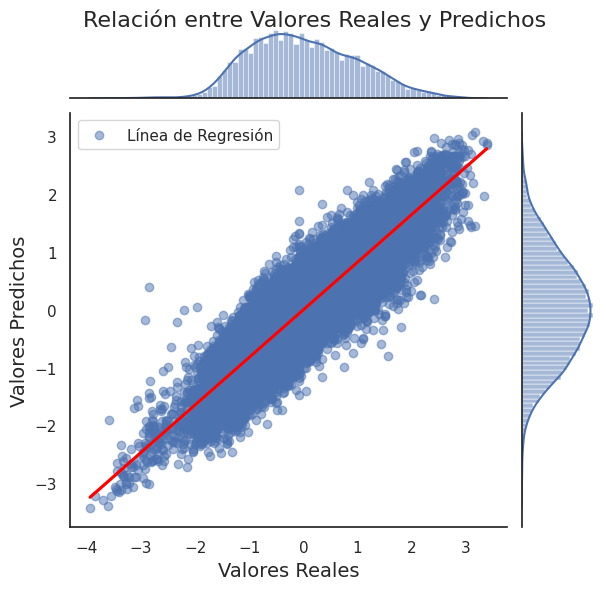

In [96]:
#Visualización de la relación entre los valores reales y las predicciones,
# Configurar el tema
sns.set_theme(style="white")

# Crear el gráfico conjunto con línea de regresión
g = sns.jointplot(x=y_test, y=pred_new, kind='reg', line_kws={"color": "red"}, scatter_kws={"alpha":0.5})

# Añadir título y etiquetas a los ejes
g.set_axis_labels('Valores Reales', 'Valores Predichos', fontsize=14)
g.fig.suptitle('Relación entre Valores Reales y Predichos', fontsize=16)
plt.subplots_adjust(top=0.95)  # Ajustar la posición del título

# Añadir una leyenda para clarificar la línea de regresión
g.ax_joint.legend(['Línea de Regresión'], loc='upper left')

# Mostrar el gráfico
plt.show()

#### Métricas después del ajuste

In [97]:
import numpy as np
# Varianza explicada
print("Explained Variance:",metrics.explained_variance_score(y_test, pred_new))
#Error máximo
print("Max Error:",metrics.max_error(y_test, pred_new))
#Error Cuadrático Medio
print("Mean Squared Error:",metrics.mean_squared_error(y_test, pred_new))
#Error Absoluto Medio
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, pred_new))
# Porcentaje de Error Absoluto Medio
print("Mean Absolute Percentage Error:",metrics.mean_absolute_percentage_error(y_test, pred_new))
# Error Mediana Absoluto
print("Median Absolute Error:",metrics.median_absolute_error(y_test, pred_new))
# R cuadrado
print("R^2:",metrics.r2_score(y_test, pred_new))
# R Cuadrado ajustado
n=X_test.shape[0]
p=X_test.shape[1] - 1
R2 = metrics.r2_score(y_test, pred_new)

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))
# Error cuadrático medio
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, pred_new)))

Explained Variance: 0.8212256366520303
Max Error: 3.248862601723067
Mean Squared Error: 0.17727880544300276
Mean Absolute Error: 0.3293856830584875
Mean Absolute Percentage Error: 1.5444447491291753
Median Absolute Error: 0.27123640758801376
R^2: 0.821225610287414
Adjusted R Squared: 0.8211690142232748
Root Mean Squared Error: 0.42104489718200216


Se verifica una leve mejora en las métricas con el ajuste

## *Modelo de Árbol de Regresión*
Los árboles de regresión dividen el conjunto de datos en grupos más pequeños basados en las características de entrada. Luego, realizan predicciones utilizando los promedios de las variables objetivo en cada hoja del árbol. Esta técnica permite al modelo capturar relaciones no lineales dentro de los datos, mejorando la precisión al adaptarse a patrones complejos.


In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [99]:
#Seleccionamos las variables independientes y la dependiente

# Variables independientes
X = data_subset.drop(columns=['MaxTemp'])
# Variable dependiente
y = data_subset['MaxTemp']

In [100]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [101]:
# Creamos y entrenamos el modelo de regresión con árbol de decisión
dt_regressor = DecisionTreeRegressor(random_state=29)
dt_regressor.fit(X_train, y_train)
#Hacemos predicciones
pred = dt_regressor.predict(X_test)

#### Métricas de Evaluación

In [102]:
# Varianza explicada
print("Varianza Explicada (EV):", metrics.explained_variance_score(y_test, pred))
# Error máximo
print("Error Máximo (ME):", metrics.max_error(y_test, pred))
# Error Cuadrático Medio
print("Error Cuadrático Medio (MSE):", metrics.mean_squared_error(y_test, pred))
# Error Absoluto Medio
print("Error Absoluto Medio (MAE):", metrics.mean_absolute_error(y_test, pred))
# Porcentaje de Error Absoluto Medio
print("Porcentaje de Error Absoluto Medio (MAPE):", metrics.mean_absolute_percentage_error(y_test, pred))
# Error Mediana Absoluto
print("Error Mediano Absoluto (MedAE):", metrics.median_absolute_error(y_test, pred))
# R cuadrado
print("Coeficiente de Determinación (R²):", metrics.r2_score(y_test, pred))
# R Cuadrado ajustado
n = X_test.shape[0]
p = X_test.shape[1] - 1
R2 = metrics.r2_score(y_test, pred)

adj_rsquared = 1 - (1 - R2) * ((n - 1) / (n - p - 1))
print('R Cuadrado Ajustado (AdjR²): {}'.format(adj_rsquared))
# Raíz del Error Cuadrático Medio
print("Raíz del Error Cuadrático Medio (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, pred)))

Varianza Explicada (EV): 0.7398120484166342
Error Máximo (ME): 3.2210006226871557
Error Cuadrático Medio (MSE): 0.2580121965750661
Error Absoluto Medio (MAE): 0.3824084143846932
Porcentaje de Error Absoluto Medio (MAPE): 2.0326122862699454
Error Mediano Absoluto (MedAE): 0.295375602953844
Coeficiente de Determinación (R²): 0.739811124822018
R Cuadrado Ajustado (AdjR²): 0.7397287547113353
Raíz del Error Cuadrático Medio (RMSE): 0.5079490098179797


En resumen, los resultados indican que el modelo de árbol de regresión tiene un buen desempeño para predecir la temperatura máxima:

MAE de 0.382: El modelo, en promedio, se desvía en 0.382 unidades de la temperatura real. MSE de 0.258: Los errores de predicción no son grandes en promedio. R² de 0.740: El modelo explica una parte significativa de la variabilidad en la temperatura máxima, aunque puede haber un margen para mejorar.

### Sintonización del modelo
La sintonización del modelo para un árbol de decisión implica ajustar los hiperparámetros del modelo para mejorar su rendimiento.
El objetivo es encontrar la combinación de hiperparámetros que minimice el error de predicción y mejore la capacidad del modelo para generalizar a datos nuevos. Esta sintonización la realizaremos utilizando técnicas como la búsqueda en cuadrícula (GridSearchCV) con validación cruzada.

In [103]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Crear el modelo de árbol de decisión para regresión
model = DecisionTreeRegressor()

# Definir los hiperparámetros a buscar
params = {
    "max_depth": np.arange(3, 6),  # Profundidad máxima del árbol: 3, 4
    "min_samples_split": np.arange(2,6)  # Muestras mínimas para dividir un nodo: 2, 3, 4
}

# Configurar la búsqueda en cuadrícula
grid = GridSearchCV(estimator=model, param_grid=params, verbose=1, n_jobs=-1, cv=15, scoring='r2')

# Ajustar el modelo utilizando la búsqueda en cuadrícula
grid.fit(X_train, y_train)

Fitting 15 folds for each of 12 candidates, totalling 180 fits


GridSearchCV(cv=15, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4, 5])},
             scoring='r2', verbose=1)

In [104]:
# Imprimir los mejores resultados
print(f'GridSearchCV Best Score: {grid.best_score_ * 100:.2f}%')
print(f'GridSearchCV Best Estimator: {grid.best_estimator_}')
print(f'GridSearchCV Best Params: {grid.best_params_}')

# Usar el mejor modelo encontrado para hacer predicciones
best_model = grid.best_estimator_

# Ajustar el mejor modelo a los datos de entrenamiento
best_model.fit(X_train, y_train)

# Hacer predicciones
pred = best_model.predict(X_test)


GridSearchCV Best Score: 77.60%
GridSearchCV Best Estimator: DecisionTreeRegressor(max_depth=5)
GridSearchCV Best Params: {'max_depth': 5, 'min_samples_split': 2}


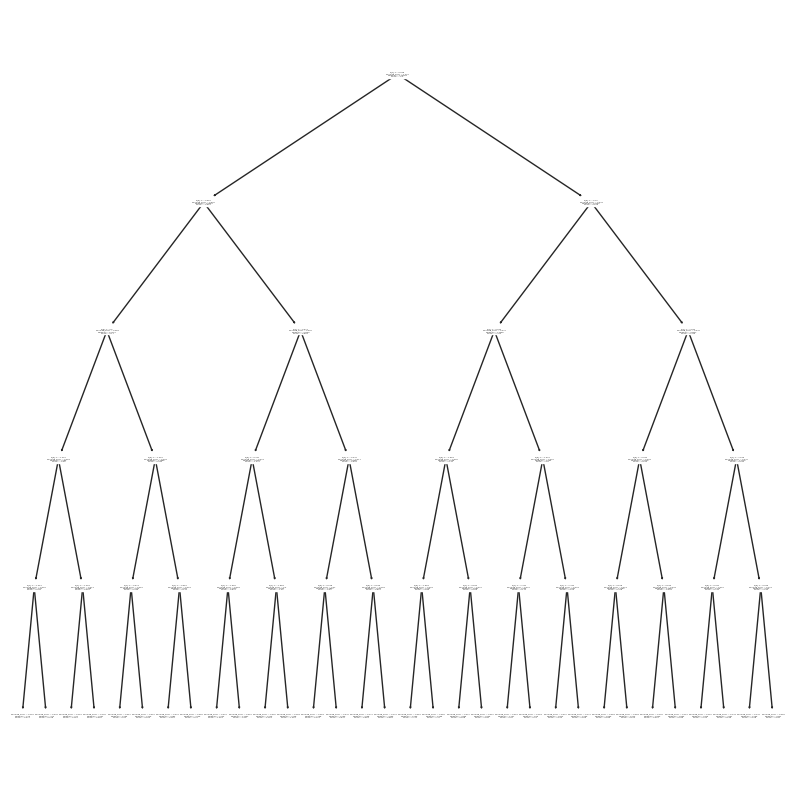

In [105]:
# Visualizamos el árbol ganador!

import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(grid.best_estimator_) 

#### Evaluación después de la sintonización

In [106]:
#Evaluación

# Varianza explicada
print("Varianza Explicada (EV):", metrics.explained_variance_score(y_test, pred))
# Error máximo
print("Error Máximo (ME):", metrics.max_error(y_test, pred))
# Error Cuadrático Medio
print("Error Cuadrático Medio (MSE):", metrics.mean_squared_error(y_test, pred))
# Error Absoluto Medio
print("Error Absoluto Medio (MAE):", metrics.mean_absolute_error(y_test, pred))
# Porcentaje de Error Absoluto Medio
print("Porcentaje de Error Absoluto Medio (MAPE):", metrics.mean_absolute_percentage_error(y_test, pred))
# Error Mediana Absoluto
print("Error Mediano Absoluto (MedAE):", metrics.median_absolute_error(y_test, pred))
# R cuadrado
print("Coeficiente de Determinación (R²):", metrics.r2_score(y_test, pred))
# R Cuadrado ajustado
n = X_test.shape[0]
p = X_test.shape[1] - 1
R2 = metrics.r2_score(y_test, pred)

adj_rsquared = 1 - (1 - R2) * ((n - 1) / (n - p - 1))
print('R Cuadrado Ajustado (AdjR²): {}'.format(adj_rsquared))
# Raíz del Error Cuadrático Medio
print("Raíz del Error Cuadrático Medio (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, pred)))

Varianza Explicada (EV): 0.774718540549824
Error Máximo (ME): 2.790340330656023
Error Cuadrático Medio (MSE): 0.22340000290909334
Error Absoluto Medio (MAE): 0.3709758080765956
Porcentaje de Error Absoluto Medio (MAPE): 1.818058015185323
Error Mediano Absoluto (MedAE): 0.30674484101484745
Coeficiente de Determinación (R²): 0.7747153187203549
R Cuadrado Ajustado (AdjR²): 0.7746439985145258
Raíz del Error Cuadrático Medio (RMSE): 0.472652095001274


Mean Squared Error: 0.2234
Mean Absolute Error: 0.3710
R^2: 0.7747


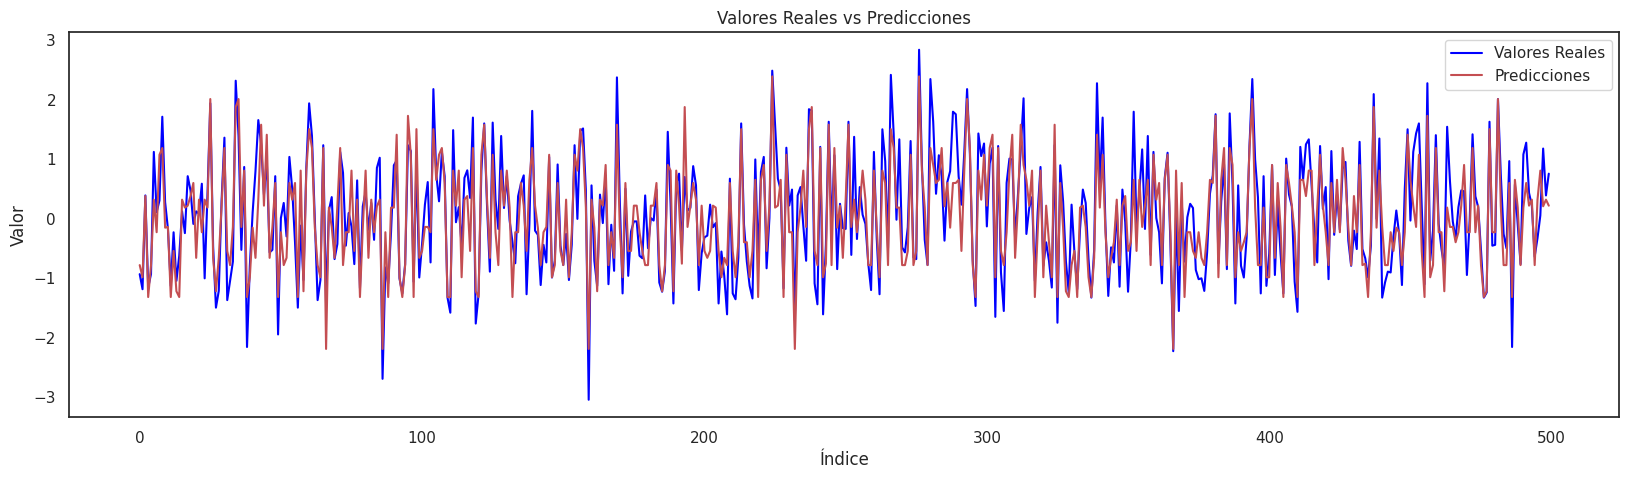

In [107]:
#Visualizar 

# Hacer predicciones
Yhat = grid.predict(X_test)

# Evaluar el modelo
print(f'Mean Squared Error: {mean_squared_error(y_test, Yhat):.4f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, Yhat):.4f}')
print(f'R^2: {r2_score(y_test, Yhat):.4f}')

# Visualizar las predicciones frente a los valores reales con una muestra de datos
sample_size = 500  # Puedes ajustar este valor según sea necesario
y_test_sample = y_test[:sample_size]
Yhat_sample = Yhat[:sample_size]

plt.subplots(figsize=(20,5))
plt.plot(y_test_sample.values, label='Valores Reales', color='blue')
plt.plot(Yhat_sample, 'r', label='Predicciones')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()


#### Comparación de los Modelos de Regresión

- R² (Coeficiente de Determinación):

- Regresión Lineal Múltiple: 0.82

- Árbol de Regresión: 0.77
  
Un valor alto de R² sugiere que el modelo puede explicar una mayor parte de la variabilidad en la variable dependiente. La Regresión Lineal Múltiple tiene un R² más alto, lo que significa que es más eficaz para predecir la variable dependiente en comparación con el Árbol de Regresión.ión.

0.73

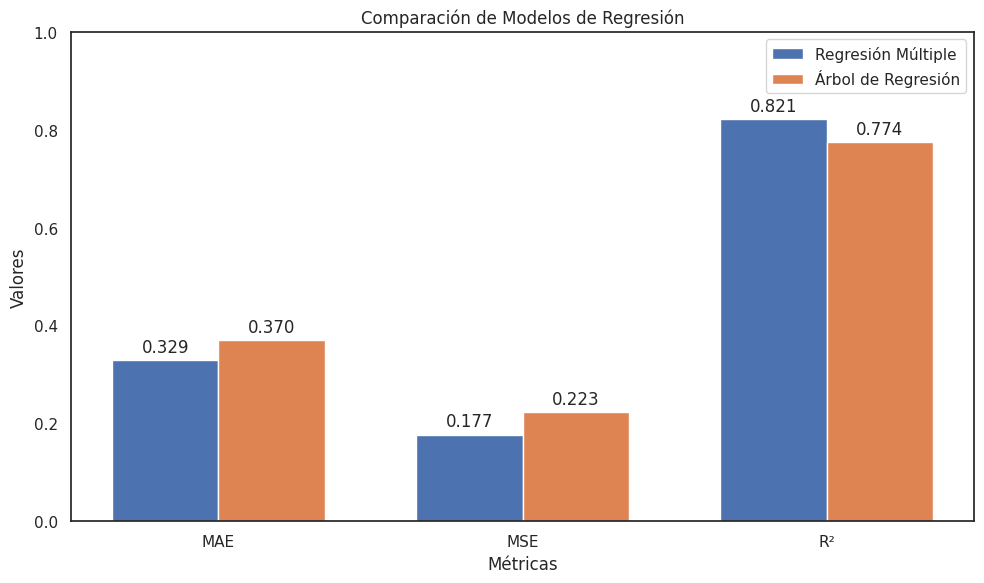

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de las métricas
labels = ['MAE', 'MSE', 'R²']
regresion_multiple = [0.329, 0.177, 0.821]
arbol_regresion = [0.370, 0.223, 0.774]

x = np.arange(len(labels))  # Etiquetas de los ejes
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, regresion_multiple, width, label='Regresión Múltiple')
rects2 = ax.bar(x + width/2, arbol_regresion, width, label='Árbol de Regresión')

# Añadir texto y etiquetas
ax.set_xlabel('Métricas')
ax.set_ylabel('Valores')
ax.set_title('Comparación de Modelos de Regresión')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Añadir las etiquetas de los valores sobre las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 1)  # Ajustar el límite del eje y para que se vean bien las etiquetas
fig.tight_layout()

plt.show()


### Modelo Árbol de Decisión (Clasificación)

- Para predecir la variable categórica objetivo RainTomorrow, utilizaremos un modelo de Árbol de Decisión.
- Es un método de aprendizaje supervisado utilizado para tareas de clasificación. Funciona dividiendo repetidamente los datos en subconjuntos más pequeños y homogéneos basándose en características (atributos) específicas

In [109]:
data_subset.head()

Estado   MinTemp   MaxTemp  Rainfall  WindDir3pm  WindSpeed3pm  \
0       2  0.190085 -0.045764 -0.204920           7      0.614071   
1       2 -0.749042  0.263677 -0.276125           7      0.384757   
2       2  0.111824  0.348070 -0.276125           7      0.843386   
3       2 -0.467304  0.671577 -0.276125           0     -1.105785   
4       2  0.831821  1.276393 -0.157450           3      0.155443   

   Humidity3pm  Pressure3pm  RainToday  RainTomorrow  Season  
0    -1.436563    -1.220105          0             0       3  
1    -1.290451    -1.115343          0             0       3  
2    -1.046931    -0.980648          0             0       3  
3    -1.728788    -0.367040          0             0       3  
4    -0.900818    -1.384732          0             0       3

In [110]:
# Importamos las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import sklearn.ensemble # Ensambles de modelos
from sklearn.metrics import accuracy_score

<Axes: xlabel='Humidity3pm', ylabel='MaxTemp'>

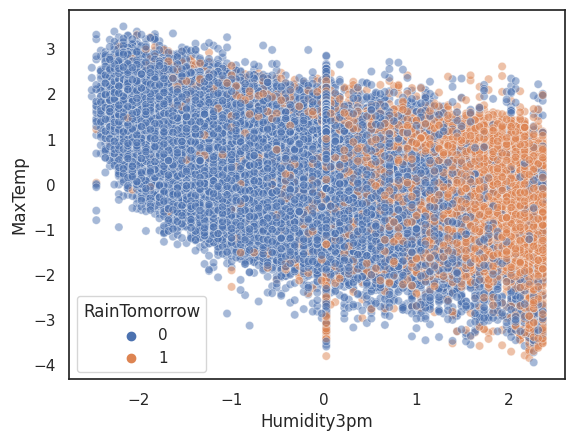

In [111]:
sns.scatterplot(
    data = data_subset,
    x = "Humidity3pm",
    y = "MaxTemp",
    hue = "RainTomorrow", #variable objetivo
    alpha = 0.5
)
# Se grafican 2 variables aunque tengan escalas distintas se quiere ver la relación

El gráfico permite observar cómo la humedad a las 3 PM y la temperatura máxima se relacionan entre sí y cómo esta relación puede diferir dependiendo de si se espera lluvia al día siguiente.

- En el caso de los árboles de decisión, una métrica que podemos optimizar es la entropía. La entropía es una medida de la incertidumbre o impureza de un conjunto de datos y se utiliza comúnmente en algoritmos de árboles de decisión para determinar cómo dividir los datos en subconjuntos más puros.

- La definición de entropía que utilizaremos es la siguiente:

**𝐻(𝑋)=−∑𝑖𝑝(𝑥𝑖)log2𝑝(𝑥𝑖)**
 
Donde  𝑋
  es el conjunto de etiquetas.

In [112]:
# Definir la función de entropía
def entropy(data):
    classes = np.unique(data)
    entropies = []
    for c in classes:
        p = sum(data == c) / len(data)
        current_entropy = p * np.log2(p)
        entropies.append(current_entropy)
    return -1 * sum(entropies)

In [113]:
# Calcular la entropía de la variable objetivo
entropy(data_subset.RainTomorrow)

0.7677291249577838

Ahora, debemos tomar una decisión, con la cual buscamos disminuir la entropía de cada uno de los subconjuntos obtenidos posterior a la decisión.

In [114]:
entropy(data_subset.RainTomorrow[data_subset.Humidity3pm >= 1]) #criterio de separación será bueno? no se sabe

0.9463731462786875

In [115]:
entropy(data_subset.RainTomorrow[data_subset.Humidity3pm < 1]) #criterio de separación será bueno? no se sabe

0.6085379993791872

Para estimar la entropía general de la decisión que tomamos debemos calcular un promedio ponderado de cada una de las entropías de cada subconjunto de datos.

In [116]:
def weighted_entropy(data, feature, label, threshold):
    indices = data[feature] >= threshold
    entropy_0 = entropy(data[label][indices])
    entropy_1 = entropy(data[label][~indices])
    return entropy_0 * (sum(indices) / len(indices)) + entropy_1 * (sum(~indices) / len(indices))

In [117]:
weighted_entropy(data_subset, "Humidity3pm", "RainTomorrow", 1) # calcula la entriopia para verificar si es buena la separación

0.6604654850545403

Para determinar la mejor variable y el mejor umbral para la decisión del nodo del árbol debemos optimizar la ganancia de información de la decisión con la siguiente definición:

IG(Y,X)=E(Y)−E(Y|X) 

Donde a la entropía total del conjunto de datos  E(Y)  le restamos la entropía promedio  E(Y|X)  de la decisión  Y .

In [118]:
entropy(data_subset.RainTomorrow) - weighted_entropy(data_subset, "Humidity3pm", "RainTomorrow", 1)

0.1072636399032435

In [119]:
humidity3pm_information_gain_sweep = []
humidity3pm_thresholds = np.linspace(data_subset.Humidity3pm.min(), data_subset.Humidity3pm.max(), 100)
for threshold in humidity3pm_thresholds:
    humidity3pm_information_gain_sweep.append(entropy(data_subset.RainTomorrow) - weighted_entropy(data_subset, "Humidity3pm", "RainTomorrow", threshold))

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

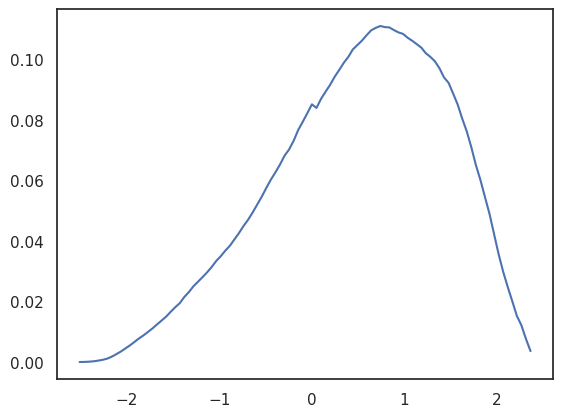

In [120]:
sns.lineplot(
    x = humidity3pm_thresholds,  #Humidity3pm
    y = humidity3pm_information_gain_sweep #ganancia
)
# el árbol comienza a calcular cuál es el mejor número con el pick más alto 

In [121]:
maxTemp_information_gain_sweep = []
maxTemp_thresholds = np.linspace(data_subset.MaxTemp.min(), data_subset.MaxTemp.max(), 100)
for threshold in maxTemp_thresholds:
    maxTemp_information_gain_sweep.append(entropy(data_subset.RainTomorrow) - weighted_entropy(data_subset, "MaxTemp", "RainTomorrow", threshold))

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

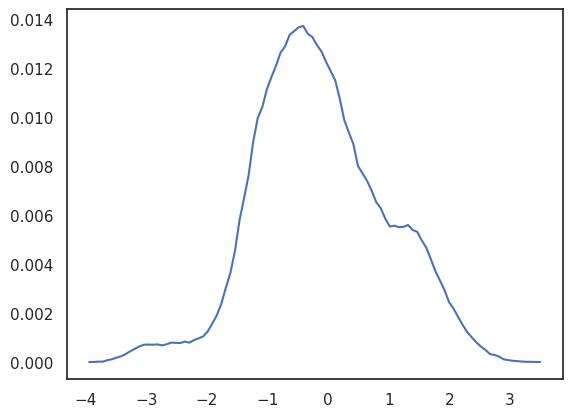

In [122]:
sns.lineplot(
    x = maxTemp_thresholds,
    y = maxTemp_information_gain_sweep
)
#busca la mayor ganancia del Humidity3pm 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0.5, 0, 'threshold')

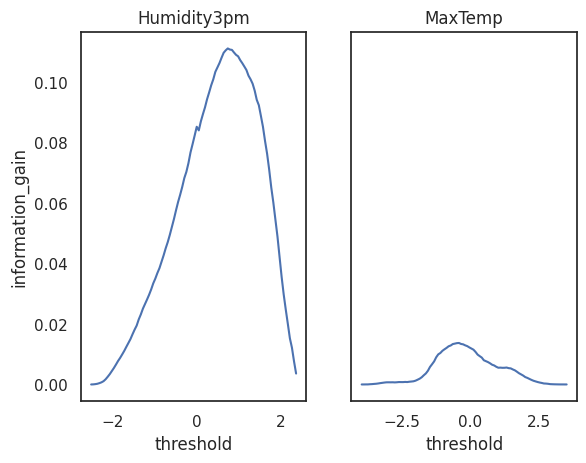

In [123]:
fig, axs = plt.subplots(nrows=1,ncols=2, sharey=True)
sns.lineplot(
    x = humidity3pm_thresholds,
    y = humidity3pm_information_gain_sweep,
    ax = axs[0]
)
sns.lineplot(
    x = maxTemp_thresholds,
    y = maxTemp_information_gain_sweep,
    ax = axs[1]
)

axs[0].set_title("Humidity3pm")
axs[1].set_title("MaxTemp")
axs[0].set_ylabel("information_gain")
axs[0].set_xlabel("threshold")
axs[1].set_xlabel("threshold")

Seleccionamos el umbral que nos aporta la mayor ganancia de información.

In [124]:
optimal_humidity3pm_threshold = humidity3pm_thresholds[np.argmax(humidity3pm_information_gain_sweep)]
optimal_humidity3pm_threshold

0.7388861653139633

In [125]:
entropy(data_subset.RainTomorrow[data_subset.Humidity3pm >= optimal_humidity3pm_threshold])

0.994961467444628

In [126]:
entropy(data_subset.RainTomorrow[data_subset.Humidity3pm < optimal_humidity3pm_threshold])

0.5555301168606519

Utilizamos la implementación del árbol de decisión de sklearn para calcular la misma decisión.

In [127]:
#arbol de decisión se entrena con Humidity3pm y MaxtTemp y clase si llueve o no mañana
single_decision = sklearn.tree.DecisionTreeClassifier(max_depth=1, criterion = "entropy") #se pone 1 para entender (4 a 6 bueno)
single_decision = single_decision.fit(data_subset[["Humidity3pm", "MaxTemp"]], data_subset.RainTomorrow)

In [128]:
single_decision.score(data_subset[["Humidity3pm", "MaxTemp"]], data_subset.RainTomorrow)

0.7950321042526707

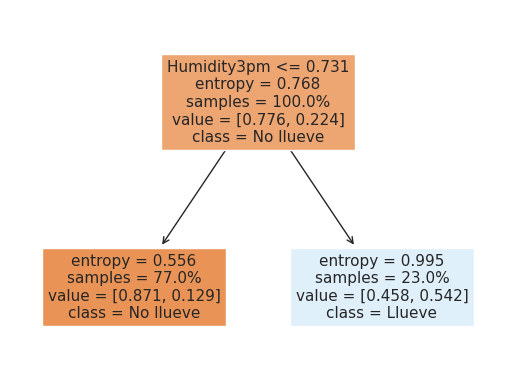

In [129]:
sklearn.tree.plot_tree( # Función que nos permite visualizar el árbol de decisión ajustado.
    single_decision, # Objeto de nuestro árbol de decisión entrenado.
    feature_names = ["Humidity3pm", "MaxTemp", "Pressure3pm"], # Nombres de las variables utilizadas para entrenar.
    class_names = ["No llueve","Llueve"], # Nombre de las clases que estamos prediciendo.
    label = "all", # Etiquetamos todas características de cada nodo.
    proportion = True, # Visualizamos las proporciones de datos en cada nodo de decisión,
    filled=True, # Coloreamos los nodos
    fontsize=11, # Establecemos el tamaño de la letra del texto dentro de cada nodo.
)
plt.show()

Preparamos el conjunto de datos para poder ajustar un árbol de decisión de mayor profundidad.

In [130]:
data_subset.head()

Estado   MinTemp   MaxTemp  Rainfall  WindDir3pm  WindSpeed3pm  \
0       2  0.190085 -0.045764 -0.204920           7      0.614071   
1       2 -0.749042  0.263677 -0.276125           7      0.384757   
2       2  0.111824  0.348070 -0.276125           7      0.843386   
3       2 -0.467304  0.671577 -0.276125           0     -1.105785   
4       2  0.831821  1.276393 -0.157450           3      0.155443   

   Humidity3pm  Pressure3pm  RainToday  RainTomorrow  Season  
0    -1.436563    -1.220105          0             0       3  
1    -1.290451    -1.115343          0             0       3  
2    -1.046931    -0.980648          0             0       3  
3    -1.728788    -0.367040          0             0       3  
4    -0.900818    -1.384732          0             0       3

In [131]:
X = data_subset.drop(columns=['RainTomorrow'])
y = data_subset['RainTomorrow']

***Razón para eliminar RISK_MM:***
RISK_MM representa la cantidad de lluvia en milímetros para el día siguiente y se utilizó para determinar si llovió o no (RainTomorrow). Incluir esta columna en el conjunto de características podría filtrar información futura al modelo, ya que RISK_MM contiene directamente información sobre la variable objetivo RainTomorrow. Este tipo de situación se llama "fuga de datos" (data leakage), donde el modelo tiene acceso a información que no debería tener durante el entrenamiento, lo que podría resultar en un rendimiento inflado del modelo y en su incapacidad para generalizar correctamente a datos nuevos.

In [132]:
# Dividimos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [133]:
# Creando y entrenando el modelo de árbol de decisión 
model = DecisionTreeClassifier(
    max_depth=3, 
    criterion = "entropy",
    random_state=29
)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=29)

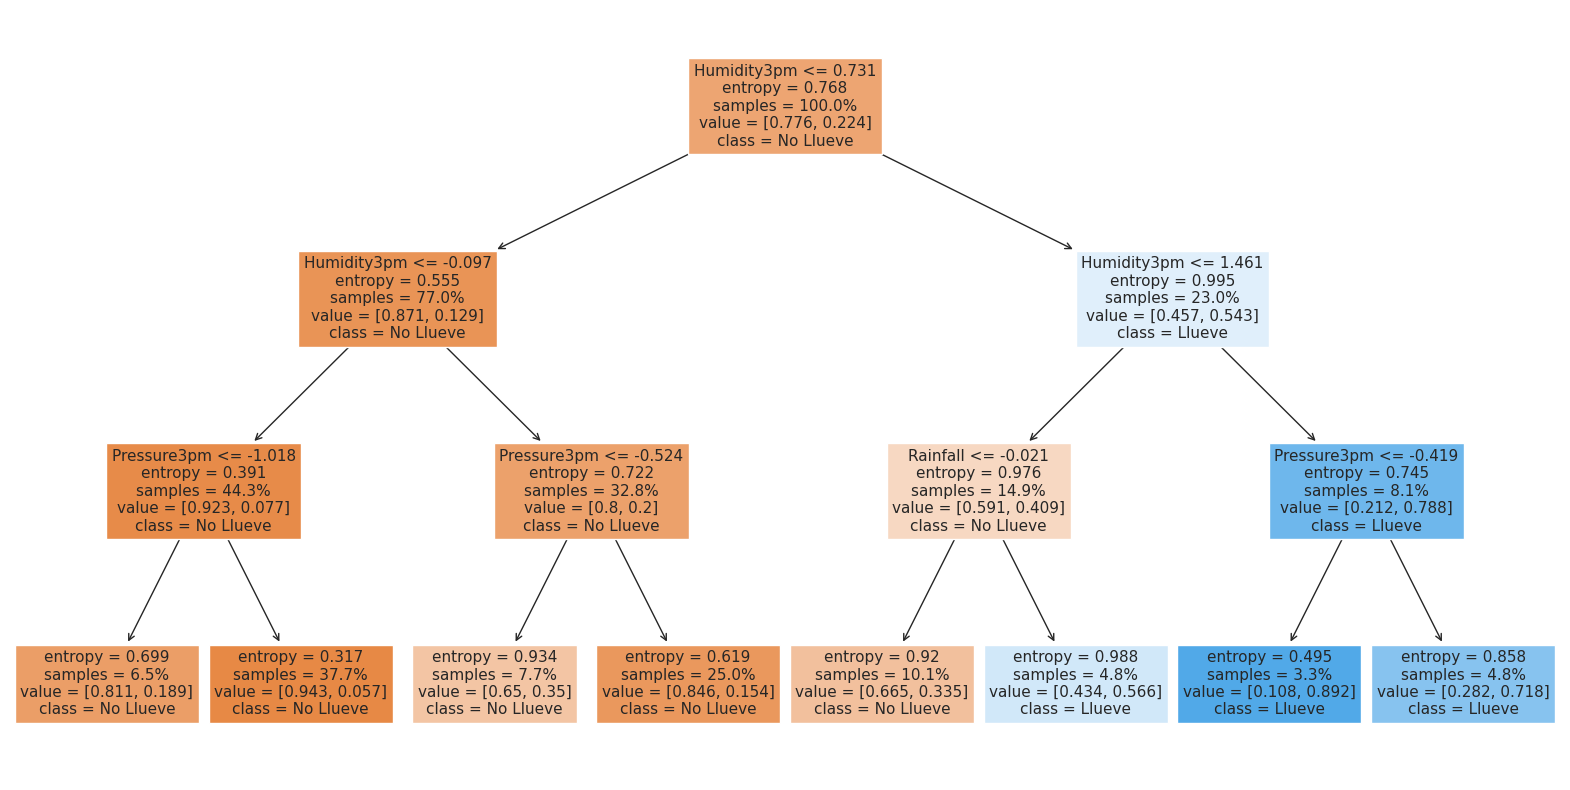

In [134]:
plt.figure(figsize = (20,10))
sklearn.tree.plot_tree( # Función que nos permite visualizar el árbol de decisión ajustado.
    model, # Objeto de nuestro árbol de decisión entrenado.
    feature_names = X.columns, # Nombres de las variables utilizadas para entrenar.
    class_names = ["No Llueve","Llueve"], # Nombre de las clases que estamos prediciendo.
    label = "all", # Etiquetamos todas características de cada nodo.
    proportion = True, # Visualizamos las proporciones de datos en cada nodo de decisión,
    filled=True, # Coloreamos los nodos
    fontsize=11, # Establecemos el tamaño de la letra del texto dentro de cada nodo.
)
plt.show()

### Evaluación del modelo

In [135]:
# Realizar predicciones en el conjunto de prueba
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = sklearn.metrics.classification_report(y_test, y_pred)

# Imprimir resultados
print("Precisión:", accuracy)
print("\nMatriz de confusión:")
print(confusion)
print("\nInforme de clasificación:")
print(report)

Precisión: 0.8272794402053518

Matriz de confusión:
[[20990  1086]
 [ 3826  2537]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22076
           1       0.70      0.40      0.51      6363

    accuracy                           0.83     28439
   macro avg       0.77      0.67      0.70     28439
weighted avg       0.81      0.83      0.81     28439



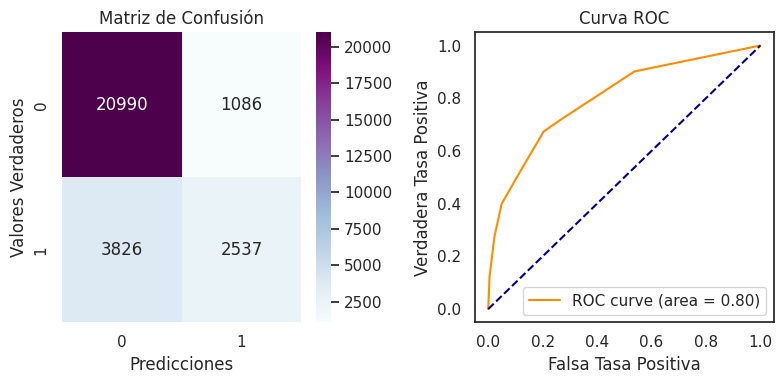

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# Crear un gráfico con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Gráfico de la Matriz de Confusión
sns.heatmap(confusion, annot=True, fmt='d', cmap='BuPu', ax=ax1)
ax1.set_xlabel('Predicciones')
ax1.set_ylabel('Valores Verdaderos')
ax1.set_title('Matriz de Confusión')

# Calcular la curva ROC y el área bajo la curva
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Gráfico de la Curva ROC
ax2.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
ax2.set_xlabel('Falsa Tasa Positiva')
ax2.set_ylabel('Verdadera Tasa Positiva')
ax2.set_title('Curva ROC')
ax2.legend(loc="lower right")

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

La precisión (accuracy) del modelo es 0.8260. Esto significa que el modelo ha clasificado correctamente el 82.6% de los casos en el conjunto de prueba. Es una precisión alta, lo que sugiere que el modelo es eficaz para la tarea de clasificación.

La matriz de confusión muestra los siguientes valores:
- Verdaderos positivos (TP) 0: 2475
- Falsos positivos (FP) 0: 1059
- Falsos negativos (FN) 1: 3888
- Verdaderos negativos (TN) 1: 21017
Estos valores indican que el modelo ha clasificado correctamente 2475 + 21017 casos, pero ha cometido 1059 + 3888 errores.

- Precisión: 70% - De todas las instancias que el modelo predijo como 'Rain Tomorrow', el 70% fueron correctas. 
- Recall: 39% - De todas las instancias reales de 'Rain Tomorrow', el modelo identificó correctamente el 39%. 
- F1-Score: 50% - Indica un nivel medio de precisión y recall para la clase 'Rain Tomorrow'.

***Observaciones***
La precisión general (accuracy) es bastante alta (83%).
La precisión para la clase de lluvia (1) es moderada (70%).
El recall para la clase de lluvia (1) es bajo (39%), indicando que el modelo tiene dificultades para capturar todos los casos de lluvia.
El F1-score para la clase de lluvia (1) es 0.50, lo que refleja un equilibrio entre precisión y recall.
Para mejorar el F1-score, especialmente el recall, podemos considerar técnicas como el balanceo de clases, ajuste de hiperparámetros, o el uso de modelos más complejos como Random Forests o Gradient Boosting.

## Preparando los datos originales con las predicciones del modelo ganador "Árbol de Decisión"

#### Para armar los datos originales de la base de test con los resultados de la predicción, se debe volver a la escala original, luego eliminar la variable objetivo.

In [137]:
#Comprobamos las columnas que debemos regresar a su escala original
numeric_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindSpeed3pm',
 'Humidity3pm',
 'Pressure3pm']

In [138]:
# Revertimos el escalado y eliminamos la variable objetivo. Finalmente convertimos a DataFrame 
data_predict = pd.DataFrame(sc.inverse_transform(X_test[numeric_columns]), columns=numeric_columns)

In [139]:
# Agregar las columnas categóricas no escaladas de vuelta
for col in X_test.columns:
    if col not in numeric_columns:
        data_predict[col] = X_test[col].values

 #### Incorporar la variable objetivo real, también agregar la variable de predicción y la probabilidad resultante

In [140]:
# Agregar variable objetivo
data_predict["RainTomorrow"] = y_test.reset_index(drop=True)

In [141]:
# Agregar las predicciones a los datos originales
data_predict['RainTomorrow_pred'] = y_pred

In [142]:
# Verificar la función de probabilidad del modelo Árbol de decisión 
# Calculamos la probalidad de cada clase (2)
model.predict_proba(X_test)

array([[0.84634292, 0.15365708],
       [0.43428048, 0.56571952],
       [0.94266403, 0.05733597],
       ...,
       [0.64959691, 0.35040309],
       [0.84634292, 0.15365708],
       [0.94266403, 0.05733597]])

In [143]:
# Agregar probabilidad mayor

data_predict["max_prob"] = np.max(model.predict_proba(X_test), axis=1)

In [144]:
# Mostramos los registros para verificar el dataset
data_predict.head()

MinTemp  MaxTemp  Rainfall  WindSpeed3pm  Humidity3pm  Pressure3pm  Estado  \
0      5.7     16.6       2.4          26.0         53.0       1020.9       1   
1     10.0     14.8      23.4          41.0         75.0       1023.4       7   
2      3.1     26.0       0.0          11.0         24.0       1015.2       7   
3      1.9     15.0       3.0          20.0         63.0       1011.2       5   
4      2.5     16.6       0.2           4.0         56.0       1015.2       2   

   WindDir3pm  RainToday  Season  RainTomorrow  RainTomorrow_pred  max_prob  
0           4          1       0             0                  0  0.846343  
1           4          1       0             1                  1  0.565720  
2           4          0       3             0                  0  0.942664  
3           3          1       0             0                  0  0.649597  
4           7          0       0             0                  0  0.846343

In [145]:
#Contamos las coincidencias que cumplen con RainTomorrow == 0:
data_predict[(data_predict["RainTomorrow"] == data_predict["RainTomorrow_pred"]) & (data_predict["RainTomorrow"] == 0)]["RainTomorrow"].count()

20990

El modelo predijo correctamente que NO llovería en 20990 casos

In [146]:
#Contamos las coincidencias que cumplen con RainTomorrow == 1:
data_predict[(data_predict["RainTomorrow"] == data_predict["RainTomorrow_pred"]) & (data_predict["RainTomorrow"] == 1)]["RainTomorrow"].count()

2537

El modelo predijo correctamente que Sí llovería en 2537 casos

### Ahora revertimos el LabelEncoder en las columnas categóricas: 'Season', 'RainTomorrow', 'RainToday', 'WindDir3pm' y 'Estado'.

In [147]:
['Season', 'RainTomorrow', 'RainToday', 'WindDir3pm', 'Estado']# Revertimos la codificación a las etiquetas originales usando los objetos LabelEncoder correspondientes
data_predict['Season'] = label_encoder_season.inverse_transform(data_predict['Season'])
data_predict['RainTomorrow'] = label_encoder_raintomorr.inverse_transform(data_predict['RainTomorrow'])
data_predict['RainToday'] = label_encoder_raintoday.inverse_transform(data_predict['RainToday'])
data_predict['WindDir3pm'] = label_encoder_wind.inverse_transform(data_predict['WindDir3pm'])
data_predict['Estado'] = label_encoder_estado.inverse_transform(data_predict['Estado'])

# Vemos el DataFrame resultante con etiquetas originales
print("DataFrame decodificado:")
data_predict.head(10)


DataFrame decodificado:


MinTemp  MaxTemp  Rainfall  WindSpeed3pm  Humidity3pm  Pressure3pm  \
0      5.7     16.6       2.4          26.0         53.0       1020.9   
1     10.0     14.8      23.4          41.0         75.0       1023.4   
2      3.1     26.0       0.0          11.0         24.0       1015.2   
3      1.9     15.0       3.0          20.0         63.0       1011.2   
4      2.5     16.6       0.2           4.0         56.0       1015.2   
5     11.0     31.2       0.0          19.0         36.0       1010.2   
6     13.4     24.0       0.4          20.0         70.0       1015.3   
7     20.4     25.4       0.2          19.0         52.0       1015.2   
8     27.0     35.4       0.0          20.0         53.0       1010.4   
9      7.8     25.2       0.0          31.0         29.0       1009.4   

                                 Estado WindDir3pm RainToday     Season  \
0                     Australia del Sur          S       Yes   Invierno   
1                              Victoria          S       Yes   Invierno   
2                              Victoria          S        No     Verano   
3  Territorio de la Capital Australiana         NW       Yes   Invierno   
4                   Nueva Gales del Sur          W        No   Invierno   
5                  Australia Occidental          W        No     Verano   
6                   Nueva Gales del Sur          E        No  Primavera   
7                   Nueva Gales del Sur         SE        No     Verano   
8                            Queensland          E        No     Verano   
9  Territorio de la Capital Australiana          W        No     Verano   

  RainTomorrow  RainTomorrow_pred  max_prob  
0           No                  0  0.846343  
1          Yes                  1  0.565720  
2           No                  0  0.942664  
3           No                  0  0.649597  
4           No                  0  0.846343  
5           No                  0  0.942664  
6           No                  0  0.664921  
7          Yes                  0  0.846343  
8           No                  0  0.649597  
9           No                  0  0.942664

### Mejoramos el Dataset para la visualización

In [148]:
# Creamos la columna "Predicción Correcta"
data_predict['Prediccion_correcta'] = data_predict.apply(
    lambda row: 'Correcta' if ((row['RainTomorrow'] == "No" and row['RainTomorrow_pred'] == 0) or 
                               (row['RainTomorrow'] == "Yes" and row['RainTomorrow_pred'] == 1)) 
    else 'Incorrecta', axis=1)

# Mostramos las primeras filas para verificar
print(data_predict.head())

   MinTemp  MaxTemp  Rainfall  WindSpeed3pm  Humidity3pm  Pressure3pm  \
0      5.7     16.6       2.4          26.0         53.0       1020.9   
1     10.0     14.8      23.4          41.0         75.0       1023.4   
2      3.1     26.0       0.0          11.0         24.0       1015.2   
3      1.9     15.0       3.0          20.0         63.0       1011.2   
4      2.5     16.6       0.2           4.0         56.0       1015.2   

                                 Estado WindDir3pm RainToday    Season  \
0                     Australia del Sur          S       Yes  Invierno   
1                              Victoria          S       Yes  Invierno   
2                              Victoria          S        No    Verano   
3  Territorio de la Capital Australiana         NW       Yes  Invierno   
4                   Nueva Gales del Sur          W        No  Invierno   

  RainTomorrow  RainTomorrow_pred  max_prob Prediccion_correcta  
0           No                  0  0.846343       

In [149]:
# Convertimos la probabilidad a porcentaje
data_predict['max_prob_pct'] = data_predict['max_prob'] * 100

# Mostramos los primeros registros para verificar el cambio
data_predict.head(30)

MinTemp  MaxTemp  Rainfall  WindSpeed3pm  Humidity3pm  Pressure3pm  \
0       5.7     16.6       2.4          26.0         53.0       1020.9   
1      10.0     14.8      23.4          41.0         75.0       1023.4   
2       3.1     26.0       0.0          11.0         24.0       1015.2   
3       1.9     15.0       3.0          20.0         63.0       1011.2   
4       2.5     16.6       0.2           4.0         56.0       1015.2   
5      11.0     31.2       0.0          19.0         36.0       1010.2   
6      13.4     24.0       0.4          20.0         70.0       1015.3   
7      20.4     25.4       0.2          19.0         52.0       1015.2   
8      27.0     35.4       0.0          20.0         53.0       1010.4   
9       7.8     25.2       0.0          31.0         29.0       1009.4   
10     11.4     22.0       0.0          13.0         51.0       1012.7   
11      6.6     15.2       3.2          13.0         63.0       1018.8   
12      8.1     21.6       0.0          11.0         87.0       1024.5   
13      1.6     15.8       0.2           7.0         59.0       1006.1   
14      3.4     18.8       0.0           2.0         67.0       1026.6   
15     10.1     24.1       0.8          28.0         33.0       1008.8   
16     13.9     21.5       3.8          17.0         55.0       1018.1   
17     19.5     28.3      13.2           9.0         64.0       1015.2   
18      7.6     26.6       0.0          24.0          6.0       1017.1   
19     20.3     22.6      14.2          13.0         89.0       1013.4   
20      9.2     24.1       2.8          26.0         52.0       1008.6   
21     11.2     23.8       0.0          15.0         36.0       1023.5   
22     16.5     27.4       0.0          33.0         63.0       1007.5   
23      9.3     16.1       0.4          20.0         35.0       1019.5   
24     13.5     26.1       0.0          13.0         40.0       1019.4   
25     21.3     37.0       0.0           9.0         17.0       1010.2   
26     12.3     19.9       1.6          13.0         56.0       1026.0   
27     -1.3     12.6       0.0           9.0         54.0       1015.2   
28     11.2     14.6      56.6          28.0         57.0        998.1   
29     19.5     25.4      44.8           7.0         94.0       1015.2   

                                  Estado WindDir3pm RainToday     Season  \
0                      Australia del Sur          S       Yes   Invierno   
1                               Victoria          S       Yes   Invierno   
2                               Victoria          S        No     Verano   
3   Territorio de la Capital Australiana         NW       Yes   Invierno   
4                    Nueva Gales del Sur          W        No   Invierno   
5                   Australia Occidental          W        No     Verano   
6                    Nueva Gales del Sur          E        No  Primavera   
7                    Nueva Gales del Sur         SE        No     Verano   
8                             Queensland          E        No     Verano   
9   Territorio de la Capital Australiana          W        No     Verano   
10                     Australia del Sur         SE        No  Primavera   
11                  Australia Occidental          S       Yes   Invierno   
12                              Victoria         SW        No      Otoño   
13                              Victoria          W        No   Invierno   
14                   Nueva Gales del Sur          N        No   Invierno   
15                              Victoria          W        No     Verano   
16                              Victoria          E       Yes  Primavera   
17                   Nueva Gales del Sur         SE       Yes     Verano   
18                     Australia del Sur          N        No  Primavera   
19                            Queensland          S       Yes      Otoño   
20  Territorio de la Capital Australiana          W       Yes      Otoño   
21                     Australia del 

In [150]:
# Guardamos el DataFrame data_predict como un archivo CSV en la misma carpeta donde se guarda el notebook
data_predict.to_csv('data_predict_.csv', index=False)

print("El archivo data_predict_decodificado.csv ha sido guardado exitosamente.")

El archivo data_predict_decodificado.csv ha sido guardado exitosamente.


## Otros modelos de prueba.

### Modelo Naive Bayes
- Es uno de los algoritmos más simples y poderosos para la clasificación basado en el Teorema de Bayes con una suposición de independencia entre los predictores. Naive Bayes es fácil de construir y particularmente útil para conjuntos de datos muy grandes. El teorema de Bayes trabaja con distribuciones que involucran varias características, la técnica trabaja con incertidumbre.

In [151]:
data_subset.head()

Estado   MinTemp   MaxTemp  Rainfall  WindDir3pm  WindSpeed3pm  \
0       2  0.190085 -0.045764 -0.204920           7      0.614071   
1       2 -0.749042  0.263677 -0.276125           7      0.384757   
2       2  0.111824  0.348070 -0.276125           7      0.843386   
3       2 -0.467304  0.671577 -0.276125           0     -1.105785   
4       2  0.831821  1.276393 -0.157450           3      0.155443   

   Humidity3pm  Pressure3pm  RainToday  RainTomorrow  Season  
0    -1.436563    -1.220105          0             0       3  
1    -1.290451    -1.115343          0             0       3  
2    -1.046931    -0.980648          0             0       3  
3    -1.728788    -0.367040          0             0       3  
4    -0.900818    -1.384732          0             0       3

In [152]:
X = data_subset.drop(columns=['RainTomorrow'])
y = data_subset['RainTomorrow']

In [153]:
# Dividimos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [154]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [155]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

### Evaluación del modelo 

In [156]:
# Realizar predicciones en el conjunto de prueba
from sklearn.metrics import confusion_matrix
y_pred_1 = gnb.predict(X_test)
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred_1)
confusion = confusion_matrix(y_test, y_pred_1)
report = sklearn.metrics.classification_report(y_test, y_pred_1)

# Imprimir resultados
print("Precisión:", accuracy)
print("\nMatriz de confusión:")
print(confusion)
print("\nInforme de clasificación:")
print(report)

Precisión: 0.8100144168219698

Matriz de confusión:
[[20243  1833]
 [ 3570  2793]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     22076
           1       0.60      0.44      0.51      6363

    accuracy                           0.81     28439
   macro avg       0.73      0.68      0.70     28439
weighted avg       0.79      0.81      0.80     28439



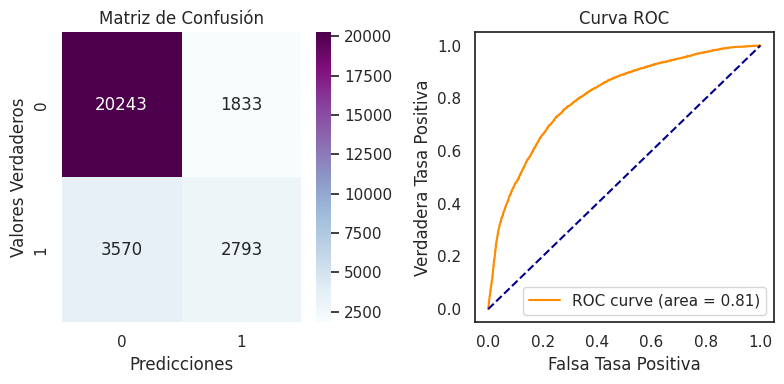

In [157]:
# Crear un gráfico con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Gráfico de la Matriz de Confusión
sns.heatmap(confusion, annot=True, fmt='d', cmap='BuPu', ax=ax1)
ax1.set_xlabel('Predicciones')
ax1.set_ylabel('Valores Verdaderos')
ax1.set_title('Matriz de Confusión')

# Calcular la curva ROC y el área bajo la curva
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Gráfico de la Curva ROC
ax2.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
ax2.set_xlabel('Falsa Tasa Positiva')
ax2.set_ylabel('Verdadera Tasa Positiva')
ax2.set_title('Curva ROC')
ax2.legend(loc="lower right")

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

La precisión (accuracy) del modelo es 0.81. Esto significa que el modelo ha clasificado correctamente el 81% de los casos en el conjunto de prueba. Es una precisión medianamente alta, lo que sugiere que el modelo es eficaz para la tarea de clasificación.

La matriz de confusión muestra los siguientes valores:

- Verdaderos positivos (TP) 0: 2793
- Falsos positivos (FP) 0: 1833
- Falsos negativos (FN) 1: 3570
- Verdaderos negativos (TN) 1: 20243
Estos valores indican que el modelo ha clasificado correctamente 2793 + 20243 casos, pero ha cometido 1833 + 3570 errores.

- Precisión: 60% ->  De todas las instancias que el modelo predijo como 'Rain Tomorrow', el 60% fueron correctas. 
- Recall: 44% -> De todas las instancias reales de 'Rain Tomorrow', el modelo identificó correctamente el 44%. 
- F1-Score: 51% -> Indica un nivel medio de precisión y recall para la clase 'Rain Tomorrow'.

***Observaciones***
El modelo Naive Bayes tiene un buen desempeño general con una precisión de 81%.
La clase 0 (No lloverá) tiene una mejor precisión, recall y F1-score en comparación con la clase 1 (Lloverá).
La clase 1 tiene una menor precisión y exhaustividad, lo que indica que el modelo tiene más dificultades para predecir correctamente los días en que lloverá.
Los resultados sugieren que el modelo es más confiable para predecir días sin lluvia que días con lluvia.
Para mejorar el rendimiento en la clase 1, podriamos considerar ajustar los parámetros del modelo, balancear las clases en el conjunto de entrenamiento o probar con modelos diferentes que puedan capturar mejor las características de los días en que lloverá.

### Validación de Modelos

Para validar cuál es el mejor modelo de acuerdo con nuestros objetivos (KPIs), evaluaremos los modelos de regresión y clasificación en función de varios criterios, que incluyen métricas de rendimiento y alineación con los objetivos específicos que hemos planteado. Este será el enfoque detallado para realizar esta validación:

- KPI Cualitativo: Para el KPI cualitativo, evaluamos la capacidad del modelo para predecir si lloverá o no en los años posteriores al 2017. El modelo de clasificación con la mayor precisión, f1-score, y ROC-AUC sería el más adecuado.

- KPI Cuantitativo: Para el KPI cuantitativo, consideramos si el modelo de regresión puede predecir adecuadamente las variables meteorológicas y cómo estas predicciones se alinean con el rendimiento del cultivo de trigo. Aquí es crucial que el modelo tenga un rendimiento mínimo del 75%. Evalúa R² y RMSE para verificar si el modelo cumple con este umbral.



### Análisis y Conclusión Modelos de Regresion

- MAE y MSE: La Regresión Múltiple tiene valores más bajos de MAE y MSE en comparación con el Árbol de Regresión, lo que indica que en promedio, los errores de predicción de la Regresión Múltiple son menores.
- R²: La Regresión Múltiple tiene un coeficiente de determinación más alto (0.821) en comparación con el Árbol de Regresión (0.774), lo que sugiere que la Regresión Múltiple explica mejor la variabilidad de los datos.

*En base a las métricas de error (MAE y MSE) y la capacidad de explicar la variabilidad en los datos (R²), la Regresión Múltiple es el mejor modelo en esta comparación. Tiene menores errores y un mayor coeficiente de determinación, lo que indica un mejor rendimiento en general.*

### Análisis y Conclusión Modelos de Clasificación

- Precisión del Modelo: Ambos modelos tienen una precisión muy similar, con el Árbol de Decisión ligeramente mejor en 1%.
- Matriz de Confusión: El Árbol de Decisión ha clasificado correctamente más casos totales, pero también ha cometido más errores en comparación con Naive Bayes.
- Precisión de la Clase: El Árbol de Decisión tiene una mejor precisión de la clase que Naive Bayes, lo que significa que es mejor para predecir correctamente los casos positivos.
- Recall: Naive Bayes tiene un mejor recall, lo que indica que es mejor para capturar todos los casos positivos reales.
- F1-Score: Naive Bayes tiene un F1-Score ligeramente superior al Árbol de Decisión, lo que sugiere un mejor equilibrio entre precisión y recall.

*Considerando el equilibrio entre todas las métricas, especialmente el F1-Score y el recall, el modelo Naive Bayes parece ser ligeramente mejor, ya que maneja mejor el equilibrio entre la precisión y el recall, aunque la diferencia no es significativa.
Sin embargo, la elección final del modelo también puede depender de las prioridades específicas del negocio o de la aplicación particular (por ejemplo, si se prefiere minimizar los falsos negativos, Naive Bayes sería preferible debido a su mayor recall).*


**Análisis de las características de los datos y del negocio identificando insights de alto impacto**

*Contexto del Negocio*

- Sector Agrícola: Cultivo de Trigo en Australia: Australia es un importante productor de trigo, con las mayores producciones en Nueva Gales del Sur y Australia Occidental.

- La producción de trigo depende en gran medida de las condiciones meteorológicas, especialmente la lluvia.

- Impacto Económico: La precisión en la predicción de la lluvia puede tener un impacto significativo en la planificación agrícola, lo que a su vez afecta la economía del país.

***Insights de Alto Impacto:***

- Predicción de la Lluvia: Los resultados de los modelos categóricos para predecir si lloverá o no sugieren que son más confiables para predecir días sin lluvia que días con lluvia. Esto puede ayudar a los agricultores a planificar sus actividades agrícolas, reducir pérdidas y optimizar el uso de recursos. Utilizar las predicciones para ajustar las estrategias de siembra y cosecha puede aumentar el rendimiento de los cultivos.
- Insight: Integrar las predicciones meteorológicas como la temperatura máxima y la humedad relacionada a las lluvias con la planificación agrícola puede mejorar la productividad y reducir el riesgo de pérdidas debido a condiciones meteorológicas adversas.

***Ejemplo de aplicación de las predicciones de Lluvia y de temperatura máxima diaria en el cultivo de trigo***

- Riego Programado: Si el agricultor de trigo sabe que lloverá en los próximos días, puede evitar el riego hoy, conservando el agua y evitando el encharcamiento.
- Estrés térmico: Conocer las temperaturas máximas ayudará a prever el estrés térmico en las plantas de trigo. Las temperaturas extremadamente altas pueden afectar negativamente el crecimiento y desarrollo del trigo.
- Planeación de la Cosecha: Evitar la cosecha en días de lluvia para reducir el riesgo de moho y asegurar que el grano se almacene seco y en buenas condiciones.
- En resumen, conocer las previsiones de lluvia y temperatura máxima permite a los agricultores tomar decisiones informadas que afectan directamente la salud de los cultivos, la eficiencia de los recursos, y en última instancia, el rendimiento y la rentabilidad de la producción de trigo.
- Aplicación de Fertilizantes y Pesticidas: La efectividad de estos insumos puede verse comprometida por la lluvia. Planificar la aplicación cuando no se espera lluvia puede mejorar su eficacia y reducir el desperdicio.
- Enfermedades Fungosas: La lluvia, las tempraturas máximas y la humedad alta pueden promover enfermedades fungosas en los cultivos de trigo. Conocer de antemano las condiciones meteorológicas permite aplicar fungicidas preventivos o tomar otras medidas.
- Control de Plagas: La temperatura y la humedad afectan la actividad de las plagas. Predecir estos factores permite planificar mejor el control de plagas.